# PRIMARY QUESTION: Which climate policy instruments are most effective in achieving their specific environmental goals?

## Prepare Dataframe

### Merge with Region

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt

df_policies = pd.read_csv("../data/climate_policy_database_policies_export.csv")

# drop unused columns
df_policies = df_policies.drop(columns=[
    "policy_id", 
    "policy_name", 
    "supranational_region", 
    "subnational_region", 
    "policy_city_or_local",
    # "policy_description",
    "stringency",
    "high_impact",
    "reference",
    "last_update",
    "impact_indicators.comments",
    "impact_indicators.name",
    "impact_indicators.value",
    "impact_indicators.base_year",
    "impact_indicators.target_year"
])

# function to convert string to list
def string_to_list(cell):
    return cell.split(",")

# convert string to list
df_policies["policy_instrument"] = df_policies["policy_instrument"].apply(string_to_list)
df_policies["sector"] = df_policies["sector"].apply(string_to_list)
df_policies["policy_type"] = df_policies["policy_type"].apply(string_to_list)
df_policies["policy_objective"] = df_policies["policy_objective"].apply(string_to_list)

# fill na
df_policies['start_date'] = df_policies['start_date'].fillna(df_policies['decision_date'])
df_policies['end_date'] = df_policies['end_date'].fillna(pd.Timestamp('now').year)
df_policies = df_policies.dropna(subset='start_date')

# load mapping region
df_region = pd.read_csv("../data/region_mapping.csv")
df_region.head()

# merge region
df_policies = df_policies.merge(df_region, left_on='country_iso', right_on='alpha-3', how='left')
print(f"Number of policies: {len(df_policies)}")
df_policies.head()

Number of policies: 6247


country_iso country_update  \
0         ARE         Annual   
1         KAZ         Annual   
2         FRA       Sporadic   
3         BTN         Annual   
4         CAN         Annual   

                                        policy_title jurisdiction  \
0  National Hydrogen Strategy United Arab Emirate...      Country   
1               Environmental Code Kazakhstan (2021)      Country   
2   Energy Policy Framework (POPE, No. France (2005)      Country   
3                      Electricity Act Bhutan (2001)      Country   
4  GHGs Formally Designated as Pollutants Canada ...      Country   

                country                                  policy_instrument  \
0  United Arab Emirates              [Policy support,  Strategic planning]   
1            Kazakhstan      [Regulatory Instruments,  Obligation schemes]   
2                France  [RD&D funding,  Tax relief,  White certificate...   
3                Bhutan  [Policy support,  Institutional creation,  Str...   
4                Canada                           [Regulatory Instruments]   

                                          sector  \
0  [Electricity and heat,  Industry,  Transport]   
1                                      [General]   
2               [Buildings,  General,  Industry]   
3                         [Electricity and heat]   
4                                      [General]   

                                  policy_description  \
0  The National Hydrogen Strategy 2050 aims to su...   
1  The code regulates activities which may have a...   
2  • Reduce energy intensity by 2% annually betwe...   
3                                                NaN   
4                                                NaN   

                                         policy_type policy_status  ...  \
0    [Other low-carbon technologies and fuel switch]      In force  ...   
1  [Energy service demand reduction and resource ...      In force  ...   
2  [Energy service demand reduction and resource ...      In force  ...   
3                   [Energy efficiency,  Renewables]      In force  ...   
4  [Energy service demand reduction and resource ...      In force  ...   

   alpha-2  alpha-3  country-code     iso_3166-2    region        sub-region  \
0       AE      ARE         784.0  ISO 3166-2:AE      Asia      Western Asia   
1       KZ      KAZ         398.0  ISO 3166-2:KZ      Asia      Central Asia   
2       FR      FRA         250.0  ISO 3166-2:FR    Europe    Western Europe   
3       BT      BTN          64.0  ISO 3166-2:BT      Asia     Southern Asia   
4       CA      CAN         124.0  ISO 3166-2:CA  Americas  Northern America   

  intermediate-region  region-code sub-region-code intermediate-region-code  
0                 NaN        142.0           145.0                      NaN  
1                 NaN        142.0           143.0                      NaN  
2                 NaN        150.0           155.0                      NaN  
3                 NaN        142.0            34.0                      NaN  
4                 NaN         19.0            21.0                      NaN  

[5 rows x 25 columns]

### Generate Policy Active Year

In [2]:
import datetime

# Function to create a range of years from start_date to end_date,
# handling NaN values, end_date = 0, and ensuring it doesn't exceed the current year
def create_year_range(row):
    current_year = datetime.datetime.now().year
    if pd.isna(row['start_date']) or pd.isna(row['end_date']) or row['end_date'] == 0:
        return []
    start_year = int(row['start_date'])
    end_year = min(int(row['end_date']), current_year)  # Limit the end year to the current year
    if start_year > end_year:  # Also check if start year is greater than end year
        return []
    return list(range(start_year, end_year + 1))

# Apply the function to each row
df_policies['active_years'] = df_policies.apply(create_year_range, axis=1)

# Explode the 'active_years' list into multiple rows
df_policies = df_policies.explode('active_years')

# Drop rows where 'active_year' is NaN which results from empty lists or incorrect year ranges
df_policies = df_policies.dropna(subset=['active_years'])

# Rename the column for clarity and convert 'active_year' to integer
df_policies.rename(columns={'active_years': 'active_year'}, inplace=True)
df_policies['active_year'] = df_policies['active_year'].astype(int)

# Display the first few rows to verify
df_policies.head()

country_iso country_update  \
0         ARE         Annual   
0         ARE         Annual   
1         KAZ         Annual   
1         KAZ         Annual   
1         KAZ         Annual   

                                        policy_title jurisdiction  \
0  National Hydrogen Strategy United Arab Emirate...      Country   
0  National Hydrogen Strategy United Arab Emirate...      Country   
1               Environmental Code Kazakhstan (2021)      Country   
1               Environmental Code Kazakhstan (2021)      Country   
1               Environmental Code Kazakhstan (2021)      Country   

                country                              policy_instrument  \
0  United Arab Emirates          [Policy support,  Strategic planning]   
0  United Arab Emirates          [Policy support,  Strategic planning]   
1            Kazakhstan  [Regulatory Instruments,  Obligation schemes]   
1            Kazakhstan  [Regulatory Instruments,  Obligation schemes]   
1            Kazakhstan  [Regulatory Instruments,  Obligation schemes]   

                                          sector  \
0  [Electricity and heat,  Industry,  Transport]   
0  [Electricity and heat,  Industry,  Transport]   
1                                      [General]   
1                                      [General]   
1                                      [General]   

                                  policy_description  \
0  The National Hydrogen Strategy 2050 aims to su...   
0  The National Hydrogen Strategy 2050 aims to su...   
1  The code regulates activities which may have a...   
1  The code regulates activities which may have a...   
1  The code regulates activities which may have a...   

                                         policy_type policy_status  ...  \
0    [Other low-carbon technologies and fuel switch]      In force  ...   
0    [Other low-carbon technologies and fuel switch]      In force  ...   
1  [Energy service demand reduction and resource ...      In force  ...   
1  [Energy service demand reduction and resource ...      In force  ...   
1  [Energy service demand reduction and resource ...      In force  ...   

   alpha-3  country-code     iso_3166-2 region    sub-region  \
0      ARE         784.0  ISO 3166-2:AE   Asia  Western Asia   
0      ARE         784.0  ISO 3166-2:AE   Asia  Western Asia   
1      KAZ         398.0  ISO 3166-2:KZ   Asia  Central Asia   
1      KAZ         398.0  ISO 3166-2:KZ   Asia  Central Asia   
1      KAZ         398.0  ISO 3166-2:KZ   Asia  Central Asia   

  intermediate-region region-code  sub-region-code intermediate-region-code  \
0                 NaN       142.0            145.0                      NaN   
0                 NaN       142.0            145.0                      NaN   
1                 NaN       142.0            143.0                      NaN   
1                 NaN       142.0            143.0                      NaN   
1                 NaN       142.0            143.0                      NaN   

  active_year  
0        2023  
0        2024  
1        2021  
1        2022  
1        2023  

[5 rows x 26 columns]

### Merge with world population data

In [ ]:
df_wpp = pd.read_csv('../data/WPP.csv')
df_wpp = df_wpp.loc[df_wpp['Variant'] == 'Medium']
df_policies = df_policies.merge(df_wpp, left_on=['country', 'active_year'], right_on=['Location', 'Time'], how='inner')
df_policies.head()

country_iso country_update  \
0         ARE         Annual   
1         ARE         Annual   
2         ARE         Annual   
3         ARE         Annual   
4         ARE         Annual   

                                        policy_title jurisdiction  \
0  National Hydrogen Strategy United Arab Emirate...      Country   
1  Green Growth Strategy United Arab Emirates (2012)      Country   
2  Desalination Efficiency United Arab Emirates (...      Country   
3  Net Zero by 2050 pathway United Arab Emirates ...      Country   
4  Renewable Energy Education and RD&D Strategy U...      Country   

                country                                  policy_instrument  \
0  United Arab Emirates              [Policy support,  Strategic planning]   
1  United Arab Emirates              [Policy support,  Strategic planning]   
2  United Arab Emirates                       [Infrastructure investments]   
3  United Arab Emirates  [Climate strategy,  Political & non-binding cl...   
4  United Arab Emirates  [Information and education,  Policy support,  ...   

                                          sector  \
0  [Electricity and heat,  Industry,  Transport]   
1                                      [General]   
2                                     [Industry]   
3                                      [General]   
4            [Electricity and heat,  Renewables]   

                                  policy_description  \
0  The National Hydrogen Strategy 2050 aims to su...   
1  The Strategy provides national and emirate-lev...   
2  New desalination plants being built in the UAE...   
3  The pathway defines the country’s climate ambi...   
4                                                NaN   

                                         policy_type policy_status  ...  \
0    [Other low-carbon technologies and fuel switch]      In force  ...   
1  [Energy efficiency,  Energy service demand red...      In force  ...   
2                                [Energy efficiency]         Ended  ...   
3  [Energy efficiency,  Energy service demand red...      In force  ...   
4                                       [Renewables]      In force  ...   

   LocID              Location  VarID Variant  Time MidPeriod   PopMale  \
0    784  United Arab Emirates      2  Medium  2023    2023.5  6970.756   
1    784  United Arab Emirates      2  Medium  2023    2023.5  6970.756   
2    784  United Arab Emirates      2  Medium  2023    2023.5  6970.756   
3    784  United Arab Emirates      2  Medium  2023    2023.5  6970.756   
4    784  United Arab Emirates      2  Medium  2023    2023.5  6970.756   

   PopFemale  PopTotal PopDensity  
0   3194.394  10165.15    121.593  
1   3194.394  10165.15    121.593  
2   3194.394  10165.15    121.593  
3   3194.394  10165.15    121.593  
4   3194.394  10165.15    121.593  

[5 rows x 36 columns]

## Mapping Sectors
with the help of GPT, eight distrinct sectors can be identified.

In [4]:
# Define the sector groupings
sector_group_mapping = {
    'Electricity and heat': 'Energy Production and Supply',
    'Renewables': 'Energy Production and Supply',
    'Gas': 'Energy Production and Supply',
    'Coal': 'Energy Production and Supply',
    'Nuclear': 'Energy Production and Supply',
    'Oil': 'Energy Production and Supply',
    'Fossil fuel exploration and production': 'Energy Production and Supply',
    
    'Transport': 'Transportation',
    'Light-duty vehicles': 'Transportation',
    'Low-emissions mobility': 'Transportation',
    'Heavy-duty vehicles': 'Transportation',
    'Shipping': 'Transportation',
    'Rail': 'Transportation',
    'Air': 'Transportation',
    
    'Buildings': 'Buildings and Infrastructure',
    'Appliances': 'Buildings and Infrastructure',
    'Heating and cooling': 'Buildings and Infrastructure',
    'Hot water and cooking': 'Buildings and Infrastructure',
    'Construction': 'Buildings and Infrastructure',
    
    'Industry': 'Industrial Processes',
    'Industrial energy related': 'Industrial Processes',
    'Industrial process CO2': 'Industrial Processes',
    'Industrial N2O': 'Industrial Processes',
    
    'Agriculture and forestry': 'Agriculture and Forestry',
    'Forestry': 'Agriculture and Forestry',
    'Agricultural CH4': 'Agriculture and Forestry',
    'Agricultural CO2': 'Agriculture and Forestry',
    'Agricultural N2O': 'Agriculture and Forestry',
    
    'Waste CH4': 'Waste Management',
    
    'Fluorinated gases': 'Emission Reduction Technologies',
    'CCS': 'Emission Reduction Technologies',
    'Negative emissions': 'Emission Reduction Technologies',
    
    'General': 'General'
}

exploded = df_policies.explode("sector")
exploded["sector"] = exploded["sector"].str.strip()

# Map sectors to their respective groups
exploded["sector_group"] = exploded["sector"].map(sector_group_mapping)

# Display the grouped sectors and their counts
sector_group_counts = exploded["sector_group"].value_counts()

# Display the resulting DataFrame for verification
print(sector_group_counts)

sector_group
Energy Production and Supply       48875
Buildings and Infrastructure       26522
Transportation                     25984
General                            18554
Industrial Processes               13746
Agriculture and Forestry           11107
Emission Reduction Technologies     1814
Waste Management                     607
Name: count, dtype: int64


# 1. Correlation Between Policy Instruments and Achievement of Policy Objectives Across Sectors

## Energy Production and Supply

In [5]:
# Define the policy instrument groupings
policy_instrument_group_mapping = {
    # Support and Strategic Measures
    'Policy support': 'Support and Strategic Measures',
    'Strategic planning': 'Support and Strategic Measures',
    'Institutional creation': 'Support and Strategic Measures',
    'Monitoring': 'Support and Strategic Measures',
    'Infrastructure investments': 'Support and Strategic Measures',
    'Funds to sub-national governments': 'Support and Strategic Measures',
    'Advice or aid in implementation': 'Support and Strategic Measures',
    'Professional training and qualification': 'Support and Strategic Measures',
    'Negotiated agreements (public-private sector)': 'Support and Strategic Measures',
    'Voluntary approaches': 'Support and Strategic Measures',
    'Public voluntary schemes': 'Support and Strategic Measures',
    'Unilateral commitments (private sector)': 'Support and Strategic Measures',
    'Auditing': 'Support and Strategic Measures',
    'Barrier removal': 'Support and Strategic Measures',
    'Removal of split incentives (landlord tenant problem)': 'Support and Strategic Measures',

    # Regulatory Instruments
    'Codes and standards': 'Regulatory Instruments',
    'Sectoral standards': 'Regulatory Instruments',
    'Building codes and standards': 'Regulatory Instruments',
    'Product standards': 'Regulatory Instruments',
    'Industrial air pollution standards': 'Regulatory Instruments',
    'Vehicle fuel-economy and emissions standards': 'Regulatory Instruments',
    'Vehicle air pollution standards': 'Regulatory Instruments',
    'Procurement rules': 'Regulatory Instruments',
    'Other mandatory requirements': 'Regulatory Instruments',
    'Obligation schemes': 'Regulatory Instruments',
    'Grid access and priority for renewables': 'Regulatory Instruments',
    'Feed-in tariffs or premiums': 'Regulatory Instruments',
    'Regulatory Instruments': 'Regulatory Instruments',
    'User charges': 'Regulatory Instruments',

    # Economic Instruments
    'Economic instruments': 'Economic Instruments',
    'Grants and subsidies': 'Economic Instruments',
    'Fiscal or financial incentives': 'Economic Instruments',
    'Tax relief': 'Economic Instruments',
    'Energy and other taxes': 'Economic Instruments',
    'Loans': 'Economic Instruments',
    'Direct investment': 'Economic Instruments',
    'Market-based instruments': 'Economic Instruments',
    'GHG emission reduction crediting and offsetting mechanism': 'Economic Instruments',
    'GHG emissions allowances': 'Economic Instruments',
    'White certificates': 'Economic Instruments',
    'Green certificates': 'Economic Instruments',
    'CO2 taxes': 'Economic Instruments',
    'Retirement premium': 'Economic Instruments',
    'Net metering': 'Economic Instruments',
    'Removal of fossil fuel subsidies': 'Economic Instruments',
    'Tendering schemes': 'Economic Instruments',

    # Targets and Commitments
    'Renewable energy target': 'Targets and Commitments',
    'Energy efficiency target': 'Targets and Commitments',
    'GHG reduction target': 'Targets and Commitments',
    'Formal & legally binding renewable energy target': 'Targets and Commitments',
    'Formal & legally binding energy efficiency target': 'Targets and Commitments',
    'Formal & legally binding GHG reduction target': 'Targets and Commitments',
    'Political & non-binding renewable energy target': 'Targets and Commitments',
    'Political & non-binding energy efficiency target': 'Targets and Commitments',
    'Political & non-binding GHG reduction target': 'Targets and Commitments',
    'Climate strategy': 'Targets and Commitments',
    'Formal & legally binding climate strategy': 'Targets and Commitments',
    'Target': 'Targets and Commitments',
    'Political & non-binding climate strategy': 'Targets and Commitments',

    # Research, Development, and Innovation
    'Research & Development and Deployment (RD&D)': 'Research, Development, and Innovation',
    'RD&D funding': 'Research, Development, and Innovation',
    'Research programme': 'Research, Development, and Innovation',
    'Technology development': 'Research, Development, and Innovation',
    'Technology deployment and diffusion': 'Research, Development, and Innovation',
    'Demonstration project': 'Research, Development, and Innovation',

    # Information and Education
    'Information and education': 'Information and Education',
    'Information provision': 'Information and Education',
    'Performance label': 'Information and Education',
    'Endorsement label': 'Information and Education',
    'Comparison label': 'Information and Education'
}

In [6]:
df_energy = exploded[exploded["sector_group"] == "Energy Production and Supply"]
df_energy = df_energy.explode("policy_instrument")
df_energy["policy_instrument"] = df_energy["policy_instrument"].str.strip()

# Map policy instruments to their respective groups
df_energy["policy_instrument_group"] = df_energy["policy_instrument"].map(policy_instrument_group_mapping)

# Display the grouped policy instruments and their counts
policy_group_counts = df_energy["policy_instrument_group"].value_counts()

policy_group_counts

policy_instrument_group
Support and Strategic Measures           29647
Economic Instruments                     28281
Regulatory Instruments                   24810
Targets and Commitments                  15141
Research, Development, and Innovation    13622
Information and Education                 5521
Name: count, dtype: int64

### 1) How do Support and Strategic Measures influence the performance and stability of the Energy Production and Supply sector?

**Data Required for Analysis**. 
1. Policy Instrument Data:
* Number of Policies in each of the grouped categories:
    * Policy Support and Strategic Planning
    * Infrastructure and Financial Investments
    * Implementation and Capacity Building
    * Collaborative and Voluntary Approaches
* Geographical Scope: Data on policy counts at global, regional, and national levels.
* Time Frame: Historical data on the number of policies to observe trends over time.

2. Performance Metrics Data:
* Energy Production and Supply Metrics:
    * Data on energy access (percentage of population with access to electricity).
    * Data on renewable energy capacity and share in the energy mix.
    * Data on fossil fuel and nuclear energy production and consumption.
    * Data on CO₂ and greenhouse gas emissions from energy production.
* Environmental Impact Metrics:
    * Data on air pollution levels and emissions from energy sources.
    * Data on water use and stress related to energy production.
    * Data on the impact of energy production on biodiversity and forests.
    * Data on incidents related to oil spills and plastic pollution if relevant.

Define for storing the corrlation

In [7]:
data = {
    "graph_name": [],
    "year": [],
    "correlation_value": [],
    "num_policies": []
}

Identify policy_type for each sector

In [8]:
df_sub = df_energy[df_energy["policy_instrument_group"] == "Support and Strategic Measures"]
df_sub = df_sub.explode("policy_type")
df_sub["policy_type"] = df_sub["policy_type"].str.strip()
df_sub = df_sub[df_sub["policy_type"] != "Unknown"]
df_sub.head()

country_iso country_update  \
0         ARE         Annual   
0         ARE         Annual   
4         ARE         Annual   
4         ARE         Annual   
7         ARE         Annual   

                                        policy_title jurisdiction  \
0  National Hydrogen Strategy United Arab Emirate...      Country   
0  National Hydrogen Strategy United Arab Emirate...      Country   
4  Renewable Energy Education and RD&D Strategy U...      Country   
4  Renewable Energy Education and RD&D Strategy U...      Country   
7  National Water and Energy Demand Management Pr...      Country   

                country   policy_instrument                sector  \
0  United Arab Emirates      Policy support  Electricity and heat   
0  United Arab Emirates  Strategic planning  Electricity and heat   
4  United Arab Emirates      Policy support  Electricity and heat   
4  United Arab Emirates      Policy support            Renewables   
7  United Arab Emirates      Policy support  Electricity and heat   

                                  policy_description  \
0  The National Hydrogen Strategy 2050 aims to su...   
0  The National Hydrogen Strategy 2050 aims to su...   
4                                                NaN   
4                                                NaN   
7  The programme includes three main pillars: Ene...   

                                     policy_type policy_status  ...  VarID  \
0  Other low-carbon technologies and fuel switch      In force  ...      2   
0  Other low-carbon technologies and fuel switch      In force  ...      2   
4                                     Renewables      In force  ...      2   
4                                     Renewables      In force  ...      2   
7                              Energy efficiency      In force  ...      2   

   Variant  Time MidPeriod   PopMale PopFemale  PopTotal  PopDensity  \
0   Medium  2023    2023.5  6970.756  3194.394  10165.15     121.593   
0   Medium  2023    2023.5  6970.756  3194.394  10165.15     121.593   
4   Medium  2023    2023.5  6970.756  3194.394  10165.15     121.593   
4   Medium  2023    2023.5  6970.756  3194.394  10165.15     121.593   
7   Medium  2023    2023.5  6970.756  3194.394  10165.15     121.593   

                   sector_group         policy_instrument_group  
0  Energy Production and Supply  Support and Strategic Measures  
0  Energy Production and Supply  Support and Strategic Measures  
4  Energy Production and Supply  Support and Strategic Measures  
4  Energy Production and Supply  Support and Strategic Measures  
7  Energy Production and Supply  Support and Strategic Measures  

[5 rows x 38 columns]

Number of policies for each policy type and sector

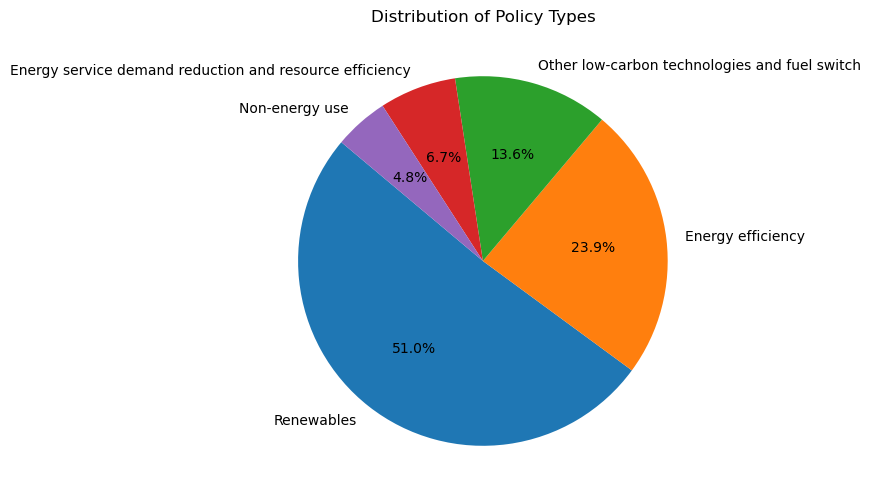

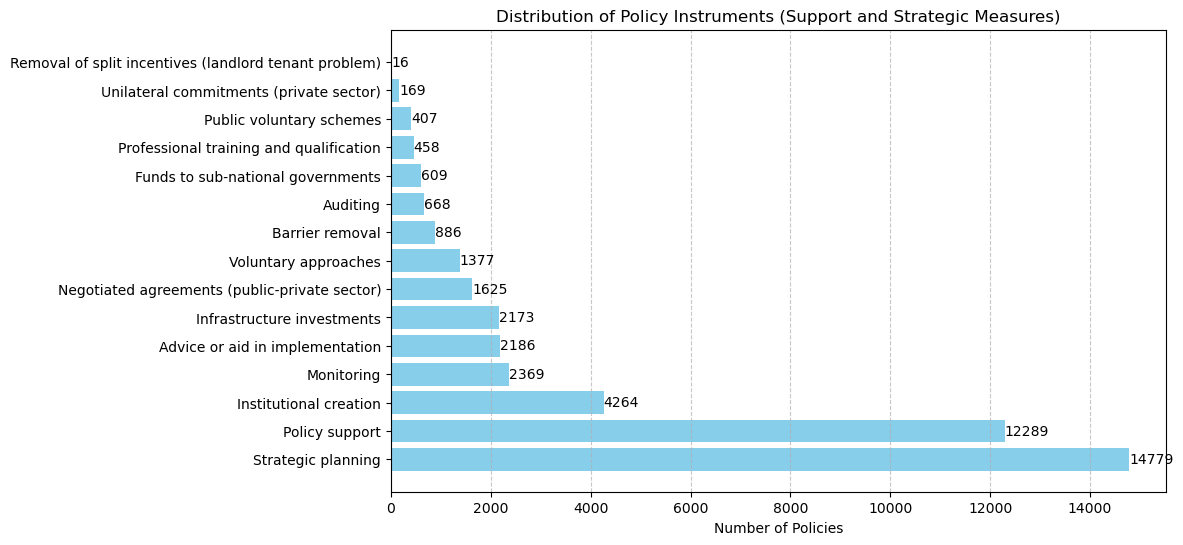

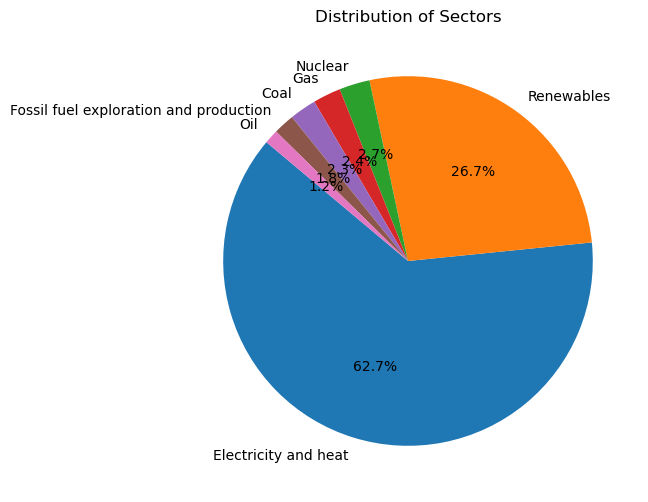

In [9]:
import matplotlib.pyplot as plt

# Value counts for policy_type and sector
policy_type_counts = df_sub["policy_type"].value_counts()
policy_instrument_counts = df_sub["policy_instrument"].value_counts()
policy_sector_counts = df_sub["sector"].value_counts()

# Create pie chart for policy_type in a separate figure
plt.figure(figsize=(8, 6))
plt.pie(policy_type_counts, labels=policy_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Policy Types')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(policy_instrument_counts.index, policy_instrument_counts.values, color='skyblue')
plt.xlabel('Number of Policies')
plt.title('Distribution of Policy Instruments (Support and Strategic Measures)')

# Add value labels to the bars
for index, value in enumerate(policy_instrument_counts.values):
    plt.text(value, index, f'{value}', va='center')

plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add grid lines for better readability
plt.show()

plt.figure(figsize=(8, 6))
plt.pie(policy_sector_counts, labels=policy_sector_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Sectors')
plt.show()

#### Number of Renewable Energy Policies vs. Share of primary energy consumption from renewable sources

In [10]:
df_renewables_policies = df_sub[df_sub["policy_type"] == "Renewables"]
df_renewables_policies.head()

country_iso country_update  \
4         ARE         Annual   
4         ARE         Annual   
7         ARE         Annual   
7         ARE         Annual   
8         ARE         Annual   

                                        policy_title jurisdiction  \
4  Renewable Energy Education and RD&D Strategy U...      Country   
4  Renewable Energy Education and RD&D Strategy U...      Country   
7  National Water and Energy Demand Management Pr...      Country   
7  National Water and Energy Demand Management Pr...      Country   
8  Energy Strategy for 2050 United Arab Emirates ...      Country   

                country   policy_instrument                sector  \
4  United Arab Emirates      Policy support  Electricity and heat   
4  United Arab Emirates      Policy support            Renewables   
7  United Arab Emirates      Policy support  Electricity and heat   
7  United Arab Emirates  Strategic planning  Electricity and heat   
8  United Arab Emirates      Policy support  Electricity and heat   

                                  policy_description policy_type  \
4                                                NaN  Renewables   
4                                                NaN  Renewables   
7  The programme includes three main pillars: Ene...  Renewables   
7  The programme includes three main pillars: Ene...  Renewables   
8  The strategy aims to diversify the energy matr...  Renewables   

  policy_status  ...  VarID  Variant  Time MidPeriod   PopMale PopFemale  \
4      In force  ...      2   Medium  2023    2023.5  6970.756  3194.394   
4      In force  ...      2   Medium  2023    2023.5  6970.756  3194.394   
7      In force  ...      2   Medium  2023    2023.5  6970.756  3194.394   
7      In force  ...      2   Medium  2023    2023.5  6970.756  3194.394   
8      In force  ...      2   Medium  2023    2023.5  6970.756  3194.394   

   PopTotal  PopDensity                  sector_group  \
4  10165.15     121.593  Energy Production and Supply   
4  10165.15     121.593  Energy Production and Supply   
7  10165.15     121.593  Energy Production and Supply   
7  10165.15     121.593  Energy Production and Supply   
8  10165.15     121.593  Energy Production and Supply   

          policy_instrument_group  
4  Support and Strategic Measures  
4  Support and Strategic Measures  
7  Support and Strategic Measures  
7  Support and Strategic Measures  
8  Support and Strategic Measures  

[5 rows x 38 columns]

Number of Renewable Energy Policies vs Share of primary energy consumption from renewable sources

In [ ]:
df_share_energy_consump = pd.read_csv("../data/energy/renewable-share-energy.csv")
df_share_energy_consump = df_share_energy_consump.dropna()
df_share_energy_consump.head()

Entity Code  Year  Renewables (% equivalent primary energy)
116  Algeria  DZA  1965                                  4.763068
117  Algeria  DZA  1966                                  3.518747
118  Algeria  DZA  1967                                  4.291954
119  Algeria  DZA  1968                                  5.486195
120  Algeria  DZA  1969                                  3.182763

In [12]:
import pandas as pd
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display

# Define the custom color palette for each region
region_colors_fixed = {
    'Americas': 'yellow',
    'Oceania': 'lightgreen',
    'Europe': 'lightblue',
    'Asia': 'blue',
    'Africa': 'magenta'
}

# Prepare the data
df_renewables_policies['policy_count'] = 1  # Add a column to count policies
policies_agg = df_renewables_policies.groupby(['country_iso', 'active_year', 'region']).agg({'policy_count': 'sum'}).reset_index()

# Merge with the renewable energy consumption data
df_combined = pd.merge(
    df_share_energy_consump,
    policies_agg,
    left_on=['Code', 'Year'],
    right_on=['country_iso', 'active_year']
)

df_combined = df_combined[df_combined["Year"] >= 2000]

# Function to plot the correlation with fixed region colors
def plot_correlation_fixed_colors(df, year):
    # Filter the data for the selected year
    df_year = df[df['Year'] == year]
    
    # Create the scatter plot
    plt.figure(figsize=(10, 6))
    scatter_plot = sns.scatterplot(
        data=df_year,
        x='policy_count',
        y='Renewables (% equivalent primary energy)',
        hue='region',
        palette=region_colors_fixed,
        s=100
    )
    
    # Add a regression line
    sns.regplot(
        data=df_year,
        x='policy_count',
        y='Renewables (% equivalent primary energy)',
        scatter=False,
        ax=scatter_plot
    )
    
    # Calculate and display correlation
    correlation = df_year['policy_count'].corr(df_year['Renewables (% equivalent primary energy)'])
    plt.title(f'Correlation between Number of Policies and Share of primary energy consumption from renewable sources in {year}\nCorrelation: {correlation:.2f}', fontsize=14)
    
    plt.xlabel('Number of Policies')
    plt.ylabel('Renewables (% equivalent primary energy)')
    plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.show()

# Create a dropdown widget for year selection
year_selector_fixed_colors = widgets.IntSlider(
    min=df_combined['Year'].min(),
    max=df_combined['Year'].max(),
    step=1,
    value=df_combined['Year'].min(),
    description='Year:'
)

# Link the dropdown to the plot function with fixed colors
def interactive_plot_fixed_colors(year):
    plot_correlation_fixed_colors(df_combined, year)

# Display the interactive plot
widgets.interactive(interactive_plot_fixed_colors, year=year_selector_fixed_colors)

interactive(children=(IntSlider(value=2000, description='Year:', max=2022, min=2000), Output()), _dom_classes=…

In [13]:
# Function to calculate and store data without plotting
def calculate_and_store_data(df, graph_name, col):
    for year in df['Year'].unique():
        # Filter the data for the selected year
        df_year = df[df['Year'] == year]
        
        if df_year.empty:
            continue

        # Calculate the correlation between policy count and renewable energy consumption
        correlation = df_year['policy_count'].corr(df_year[col])
        num_policies = df_year['policy_count'].sum()

        # Store the data in the dictionary
        data['graph_name'].append(graph_name)
        data['year'].append(year)
        data['correlation_value'].append(correlation)
        data['num_policies'].append(num_policies)

# Run the function to calculate and store the data
calculate_and_store_data(df_combined, 'renewables_consumption', 'Renewables (% equivalent primary energy)')

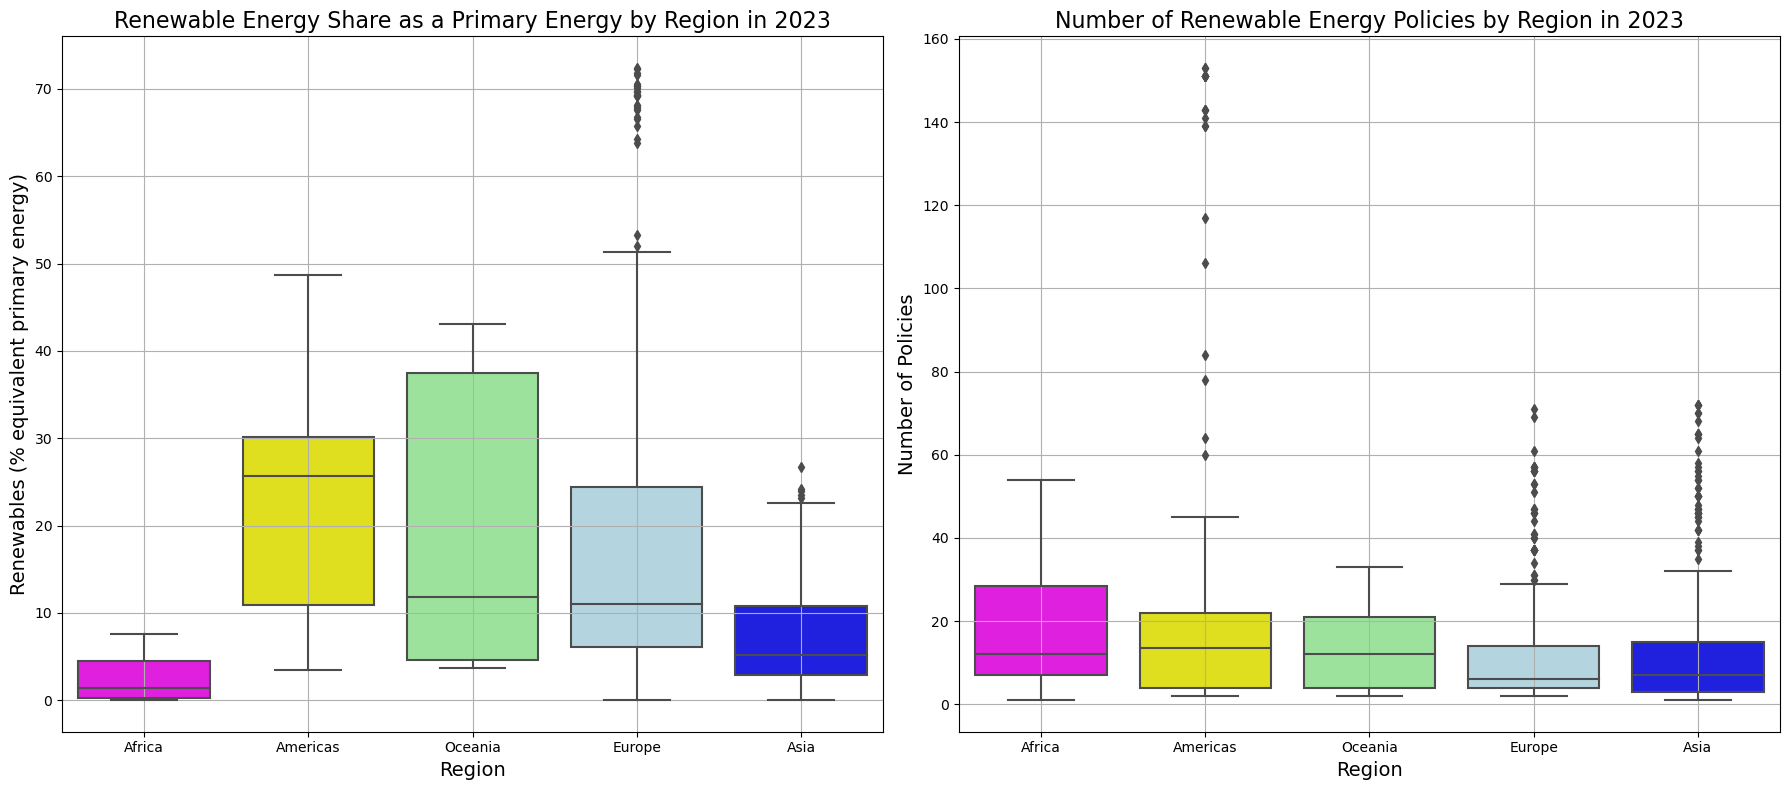

In [14]:
# Function to create the box plots for renewable energy share and policy count by region
def plot_boxplots_by_region(df):
    fig, axes = plt.subplots(1, 2, figsize=(18, 8))

    # Plot for renewable energy share
    sns.boxplot(
        data=df,
        x='region',
        y='Renewables (% equivalent primary energy)',
        palette=region_colors_fixed,
        ax=axes[0]
    )
    axes[0].set_title('Renewable Energy Share as a Primary Energy by Region in 2023', fontsize=16)
    axes[0].set_xlabel('Region', fontsize=14)
    axes[0].set_ylabel('Renewables (% equivalent primary energy)', fontsize=14)
    axes[0].grid(True)

    # Plot for policy count
    sns.boxplot(
        data=df,
        x='region',
        y='policy_count',
        palette=region_colors_fixed,
        ax=axes[1]
    )
    axes[1].set_title('Number of Renewable Energy Policies by Region in 2023', fontsize=16)
    axes[1].set_xlabel('Region', fontsize=14)
    axes[1].set_ylabel('Number of Policies', fontsize=14)
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()

# Plot the box plots
plot_boxplots_by_region(df_combined)

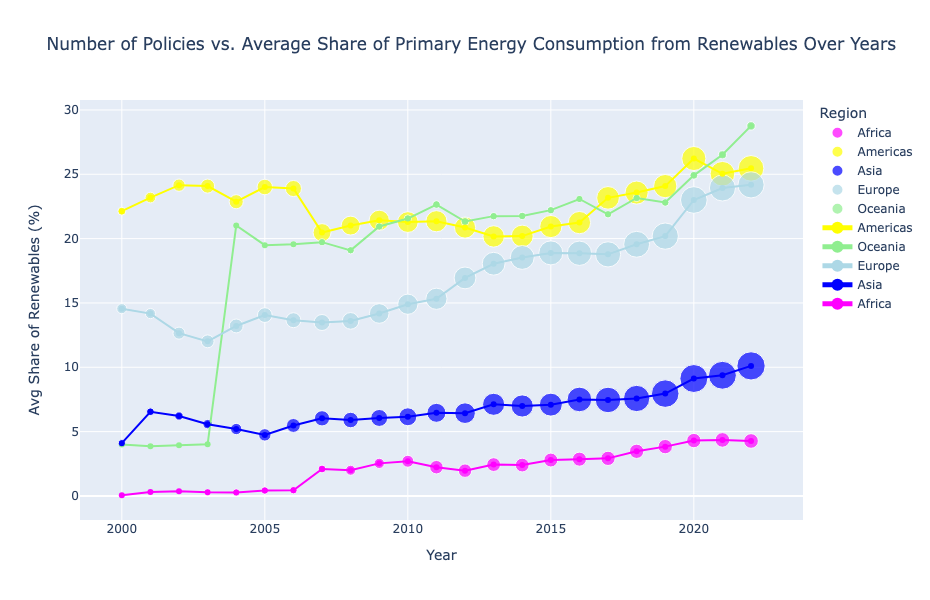

In [15]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Assuming df_combined is already prepared as per your provided code
# Aggregate the data by region and year
region_agg = df_combined.groupby(['region', 'Year']).agg({
    'policy_count': 'sum',  # Total number of policies
    'Renewables (% equivalent primary energy)': 'mean'  # Average share of renewable energy consumption
}).reset_index()

# Rename the column for clarity
region_agg.rename(columns={'Renewables (% equivalent primary energy)': 'Avg Share of Renewables'}, inplace=True)

# Define the custom color palette for each region
region_colors_fixed = {
    'Americas': 'yellow',
    'Oceania': 'lightgreen',
    'Europe': 'lightblue',
    'Asia': 'blue',
    'Africa': 'magenta'
}

# Function to plot number of policies vs. avg share of renewables over years by region
def plot_policies_vs_renewables_interactive(region_agg):
    # Create a scatter plot with lines
    fig = px.scatter(
        region_agg,
        x='Year',
        y='Avg Share of Renewables',
        color='region',
        size='policy_count',
        color_discrete_map=region_colors_fixed,
        title='Number of Policies vs. Average Share of Primary Energy Consumption from Renewables Over Years',
        labels={'policy_count': 'Number of Policies', 'Avg Share of Renewables': 'Avg Share of Renewables (%)'}
    )
    
    # Add lines for each region
    for region in region_colors_fixed.keys():
        region_data = region_agg[region_agg['region'] == region]
        fig.add_trace(go.Scatter(
            x=region_data['Year'],
            y=region_data['Avg Share of Renewables'],
            mode='lines+markers',
            name=region,
            marker=dict(color=region_colors_fixed[region]),
            line=dict(color=region_colors_fixed[region]),
            text=region_data['policy_count'],  # Hover text will show number of policies
            hovertemplate='Year: %{x}<br>Avg Share of Renewables: %{y:.2f}%<br>Number of Policies: %{text}<extra></extra>'
        ))
    
    # Update layout for better aesthetics
    fig.update_layout(
        xaxis_title='Year',
        yaxis_title='Avg Share of Renewables (%)',
        legend_title='Region',
        hovermode='x unified',
        height=600
    )
    
    fig.show()

# Call the plotting function with the refined approach
plot_policies_vs_renewables_interactive(region_agg)

#### Number of Renewable Energy Policies vs Share of electricity production from renewables

In [ ]:
df_share_energy_prod = pd.read_csv("../data/energy/modern-renewable-prod.csv")
df_share_energy_prod = df_share_energy_prod.dropna()
df_share_energy_prod.head()

Entity Code  Year  Electricity from wind - TWh  \
24  Afghanistan  AFG  2000                          0.0   
25  Afghanistan  AFG  2001                          0.0   
26  Afghanistan  AFG  2002                          0.0   
27  Afghanistan  AFG  2003                          0.0   
28  Afghanistan  AFG  2004                          0.0   

    Electricity from hydro - TWh  Electricity from solar - TWh  \
24                          0.31                           0.0   
25                          0.50                           0.0   
26                          0.56                           0.0   
27                          0.63                           0.0   
28                          0.56                           0.0   

    Other renewables including bioenergy - TWh  
24                                         0.0  
25                                         0.0  
26                                         0.0  
27                                         0.0  
28                                         0.0

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Sample Data (Replace this with your actual DataFrame loading code)
# df_renewables_policies = pd.read_csv("renewable_policies.csv")
# df_share_energy_consump = pd.read_csv("share_energy_consumption.csv")

# Define the custom color palette for each region
region_colors_fixed = {
    'Americas': 'yellow',
    'Oceania': 'lightgreen',
    'Europe': 'lightblue',
    'Asia': 'blue',
    'Africa': 'magenta'
}

# Prepare the data
df_renewables_policies['policy_count'] = 1  # Add a column to count policies
policies_agg = df_renewables_policies.groupby(['country_iso', 'active_year', 'region']).agg({'policy_count': 'sum'}).reset_index()

# Merge with the renewable energy consumption data
df_combined = pd.merge(
    df_share_energy_prod,
    policies_agg,
    left_on=['Code', 'Year'],
    right_on=['country_iso', 'active_year']
)

df_combined = df_combined[df_combined["Year"] >= 2000]

# Function to plot the correlation with fixed region colors
def plot_correlation_fixed_colors(df, year, y_column):
    # Filter the data for the selected year
    df_year = df[df['Year'] == year]
    
    # Create the scatter plot
    plt.figure(figsize=(10, 6))
    scatter_plot = sns.scatterplot(
        data=df_year,
        x='policy_count',
        y=y_column,
        hue='region',
        palette=region_colors_fixed,
        s=100
    )
    
    # Add a regression line
    sns.regplot(
        data=df_year,
        x='policy_count',
        y=y_column,
        scatter=False,
        ax=scatter_plot
    )
    
    # Calculate and display correlation
    correlation = df_year['policy_count'].corr(df_year[y_column])
    plt.title(f'Correlation between Number of Policies and {y_column} in {year}\nCorrelation: {correlation:.2f}', fontsize=14)
    
    plt.xlabel('Number of Policies')
    plt.ylabel(y_column)
    plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.show()

# Create a dropdown widget for year selection
year_selector_fixed_colors = widgets.IntSlider(
    min=df_combined['Year'].min(),
    max=df_combined['Year'].max(),
    step=1,
    value=df_combined['Year'].min(),
    description='Year:'
)

# Create a dropdown widget for column selection
column_selector = widgets.Dropdown(
    options=[
        'Electricity from wind - TWh',
        'Electricity from hydro - TWh',
        'Electricity from solar - TWh',
        'Other renewables including bioenergy - TWh'
    ],
    value='Electricity from wind - TWh',
    description='Y-axis:'
)

# Link the dropdown to the plot function with fixed colors
def interactive_plot_fixed_colors(year, y_column):
    plot_correlation_fixed_colors(df_combined, year, y_column)

# Display the interactive plot
widgets.interactive(interactive_plot_fixed_colors, year=year_selector_fixed_colors, y_column=column_selector)

interactive(children=(IntSlider(value=2000, description='Year:', max=2023, min=2000), Dropdown(description='Y-…

In [18]:
for opt in [
    'Electricity from wind - TWh',
    'Electricity from hydro - TWh',
    'Electricity from solar - TWh',
    'Other renewables including bioenergy - TWh'
]:
    calculate_and_store_data(df_combined, f'renewables_production_{opt}', opt)

In [19]:
# Function to create the box plots for selected renewable energy type and policy count by region
def plot_boxplots_by_region(df, y_column):
    fig, axes = plt.subplots(1, 2, figsize=(18, 8))

    # Plot for the selected renewable energy type
    sns.boxplot(
        data=df,
        x='region',
        y=y_column,
        palette=region_colors_fixed,
        ax=axes[0]
    )
    axes[0].set_title(f'{y_column} by Region', fontsize=16)
    axes[0].set_xlabel('Region', fontsize=14)
    axes[0].set_ylabel(y_column, fontsize=14)
    axes[0].grid(True)

    # Plot for policy count
    sns.boxplot(
        data=df,
        x='region',
        y='policy_count',
        palette=region_colors_fixed,
        ax=axes[1]
    )
    axes[1].set_title('Number of Renewable Energy Policies by Region', fontsize=16)
    axes[1].set_xlabel('Region', fontsize=14)
    axes[1].set_ylabel('Number of Policies', fontsize=14)
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()

# Create a dropdown widget for selecting the renewable energy column
column_selector = widgets.Dropdown(
    options=[
        'Electricity from wind - TWh',
        'Electricity from hydro - TWh',
        'Electricity from solar - TWh',
        'Other renewables including bioenergy - TWh'
    ],
    value='Electricity from wind - TWh',
    description='Y-axis:'
)

# Link the dropdown to the plot function
def interactive_boxplot(y_column):
    plot_boxplots_by_region(df_combined, y_column)

# Display the interactive box plot
widgets.interactive(interactive_boxplot, y_column=column_selector)

interactive(children=(Dropdown(description='Y-axis:', options=('Electricity from wind - TWh', 'Electricity fro…

In [20]:
# Assuming df_combined is already prepared as per your provided code
# Aggregate the data by region and year
region_agg = df_combined.groupby(['region', 'Year']).agg({
    'policy_count': 'sum',  # Total number of policies
    'Electricity from wind - TWh': 'mean',  # Average share of electricity from wind
    'Electricity from hydro - TWh': 'mean',  # Average share of electricity from hydro
    'Electricity from solar - TWh': 'mean',  # Average share of electricity from solar
    'Other renewables including bioenergy - TWh': 'mean'  # Average share of other renewables
}).reset_index()

# Define the custom color palette for each region
region_colors_fixed = {
    'Americas': 'yellow',
    'Oceania': 'lightgreen',
    'Europe': 'lightblue',
    'Asia': 'blue',
    'Africa': 'magenta'
}

# Function to plot number of policies vs. renewable energy consumption over years by region
def plot_policies_vs_renewables_interactive(region_agg, energy_type):
    # Create a scatter plot with lines
    fig = px.scatter(
        region_agg,
        x='Year',
        y=energy_type,
        color='region',
        size='policy_count',
        color_discrete_map=region_colors_fixed,
        title=f'Number of Policies vs. Average {energy_type} Over Years',
        labels={'policy_count': 'Number of Policies', energy_type: f'Avg {energy_type} (TWh)'}
    )
    
    # Add lines for each region
    for region in region_colors_fixed.keys():
        region_data = region_agg[region_agg['region'] == region]
        fig.add_trace(go.Scatter(
            x=region_data['Year'],
            y=region_data[energy_type],
            mode='lines+markers',
            name=region,
            marker=dict(color=region_colors_fixed[region]),
            line=dict(color=region_colors_fixed[region]),
            text=region_data['policy_count'],  # Hover text will show number of policies
            hovertemplate=f'Year: {{%x}}<br>Avg {energy_type}: {{%y:.2f}} TWh<br>Number of Policies: {{%text}}<extra></extra>'
        ))
    
    # Update layout for better aesthetics
    fig.update_layout(
        xaxis_title='Year',
        yaxis_title=f'Avg {energy_type} (TWh)',
        legend_title='Region',
        hovermode='x unified',
        height=600
    )
    
    fig.show()

# Create a dropdown widget for selecting the renewable energy column
energy_type_selector = widgets.Dropdown(
    options=[
        'Electricity from wind - TWh',
        'Electricity from hydro - TWh',
        'Electricity from solar - TWh',
        'Other renewables including bioenergy - TWh'
    ],
    value='Electricity from wind - TWh',
    description='Energy Type:'
)

# Link the dropdown to the plot function
def interactive_plot(energy_type):
    plot_policies_vs_renewables_interactive(region_agg, energy_type)

# Display the interactive plot
widgets.interactive(interactive_plot, energy_type=energy_type_selector)

interactive(children=(Dropdown(description='Energy Type:', options=('Electricity from wind - TWh', 'Electricit…

#### Number of Fossil Fuel Policies vs Share of primary energy consumption from fossil fuels

In [21]:
df_fossil_policies = df_sub[df_sub["sector"].isin(["Gas", "Oil", "Coal", "Fossil fuel exploration and production"])]
df_fossil_policies.head()

country_iso country_update  \
8         ARE         Annual   
8         ARE         Annual   
8         ARE         Annual   
8         ARE         Annual   
8         ARE         Annual   

                                        policy_title jurisdiction  \
8  Energy Strategy for 2050 United Arab Emirates ...      Country   
8  Energy Strategy for 2050 United Arab Emirates ...      Country   
8  Energy Strategy for 2050 United Arab Emirates ...      Country   
8  Energy Strategy for 2050 United Arab Emirates ...      Country   
8  Energy Strategy for 2050 United Arab Emirates ...      Country   

                country   policy_instrument sector  \
8  United Arab Emirates      Policy support   Coal   
8  United Arab Emirates      Policy support   Coal   
8  United Arab Emirates      Policy support   Coal   
8  United Arab Emirates  Strategic planning   Coal   
8  United Arab Emirates  Strategic planning   Coal   

                                  policy_description  \
8  The strategy aims to diversify the energy matr...   
8  The strategy aims to diversify the energy matr...   
8  The strategy aims to diversify the energy matr...   
8  The strategy aims to diversify the energy matr...   
8  The strategy aims to diversify the energy matr...   

                                     policy_type policy_status  ...  VarID  \
8                              Energy efficiency      In force  ...      2   
8                                     Renewables      In force  ...      2   
8  Other low-carbon technologies and fuel switch      In force  ...      2   
8                              Energy efficiency      In force  ...      2   
8                                     Renewables      In force  ...      2   

   Variant  Time MidPeriod   PopMale PopFemale  PopTotal  PopDensity  \
8   Medium  2023    2023.5  6970.756  3194.394  10165.15     121.593   
8   Medium  2023    2023.5  6970.756  3194.394  10165.15     121.593   
8   Medium  2023    2023.5  6970.756  3194.394  10165.15     121.593   
8   Medium  2023    2023.5  6970.756  3194.394  10165.15     121.593   
8   Medium  2023    2023.5  6970.756  3194.394  10165.15     121.593   

                   sector_group         policy_instrument_group  
8  Energy Production and Supply  Support and Strategic Measures  
8  Energy Production and Supply  Support and Strategic Measures  
8  Energy Production and Supply  Support and Strategic Measures  
8  Energy Production and Supply  Support and Strategic Measures  
8  Energy Production and Supply  Support and Strategic Measures  

[5 rows x 38 columns]

In [ ]:
df_share_energy_consum = pd.read_csv('../data/energy/fossil-fuels-share-energy.csv')
df_share_energy_consum = df_share_energy_consum.dropna()
df_share_energy_consum.head()

Entity Code  Year  Fossil fuels (% equivalent primary energy)
116  Algeria  DZA  1965                                   95.236930
117  Algeria  DZA  1966                                   96.481255
118  Algeria  DZA  1967                                   95.708046
119  Algeria  DZA  1968                                   94.513800
120  Algeria  DZA  1969                                   96.817230

In [23]:
# Define the custom color palette for each region
region_colors_fixed = {
    'Americas': 'yellow',
    'Oceania': 'lightgreen',
    'Europe': 'lightblue',
    'Asia': 'blue',
    'Africa': 'magenta'
}

# Prepare the data
df_fossil_policies['policy_count'] = 1  # Add a column to count policies
policies_agg = df_fossil_policies.groupby(['country_iso', 'active_year', 'region']).agg({'policy_count': 'sum'}).reset_index()

# Merge with the renewable energy consumption data
df_combined = pd.merge(
    df_share_energy_consum,
    policies_agg,
    left_on=['Code', 'Year'],
    right_on=['country_iso', 'active_year']
)

df_combined = df_combined[df_combined["Year"] >= 2000]

# Function to plot the correlation with fixed region colors
def plot_correlation_fixed_colors(df, year):
    # Filter the data for the selected year
    df_year = df[df['Year'] == year]
    
    # Create the scatter plot
    plt.figure(figsize=(10, 6))
    scatter_plot = sns.scatterplot(
        data=df_year,
        x='policy_count',
        y='Fossil fuels (% equivalent primary energy)',
        hue='region',
        palette=region_colors_fixed,
        s=100
    )
    
    # Add a regression line
    sns.regplot(
        data=df_year,
        x='policy_count',
        y='Fossil fuels (% equivalent primary energy)',
        scatter=False,
        ax=scatter_plot
    )
    
    # Calculate and display correlation
    correlation = df_year['policy_count'].corr(df_year['Fossil fuels (% equivalent primary energy)'])
    plt.title(f'Correlation between Number of Policies and Share of primary energy consumption from fossil fuels in {year}\nCorrelation: {correlation:.2f}', fontsize=14)
    
    plt.xlabel('Number of Policies')
    plt.ylabel('Fossil fuels (% equivalent primary energy)')
    plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.show()

# Create a dropdown widget for year selection
year_selector_fixed_colors = widgets.IntSlider(
    min=df_combined['Year'].min(),
    max=df_combined['Year'].max(),
    step=1,
    value=df_combined['Year'].min(),
    description='Year:'
)

# Link the dropdown to the plot function with fixed colors
def interactive_plot_fixed_colors(year):
    plot_correlation_fixed_colors(df_combined, year)

# Display the interactive plot
widgets.interactive(interactive_plot_fixed_colors, year=year_selector_fixed_colors)

interactive(children=(IntSlider(value=2000, description='Year:', max=2022, min=2000), Output()), _dom_classes=…

In [24]:
calculate_and_store_data(df_combined, f'primary_fossil_consumption', 'Fossil fuels (% equivalent primary energy)')

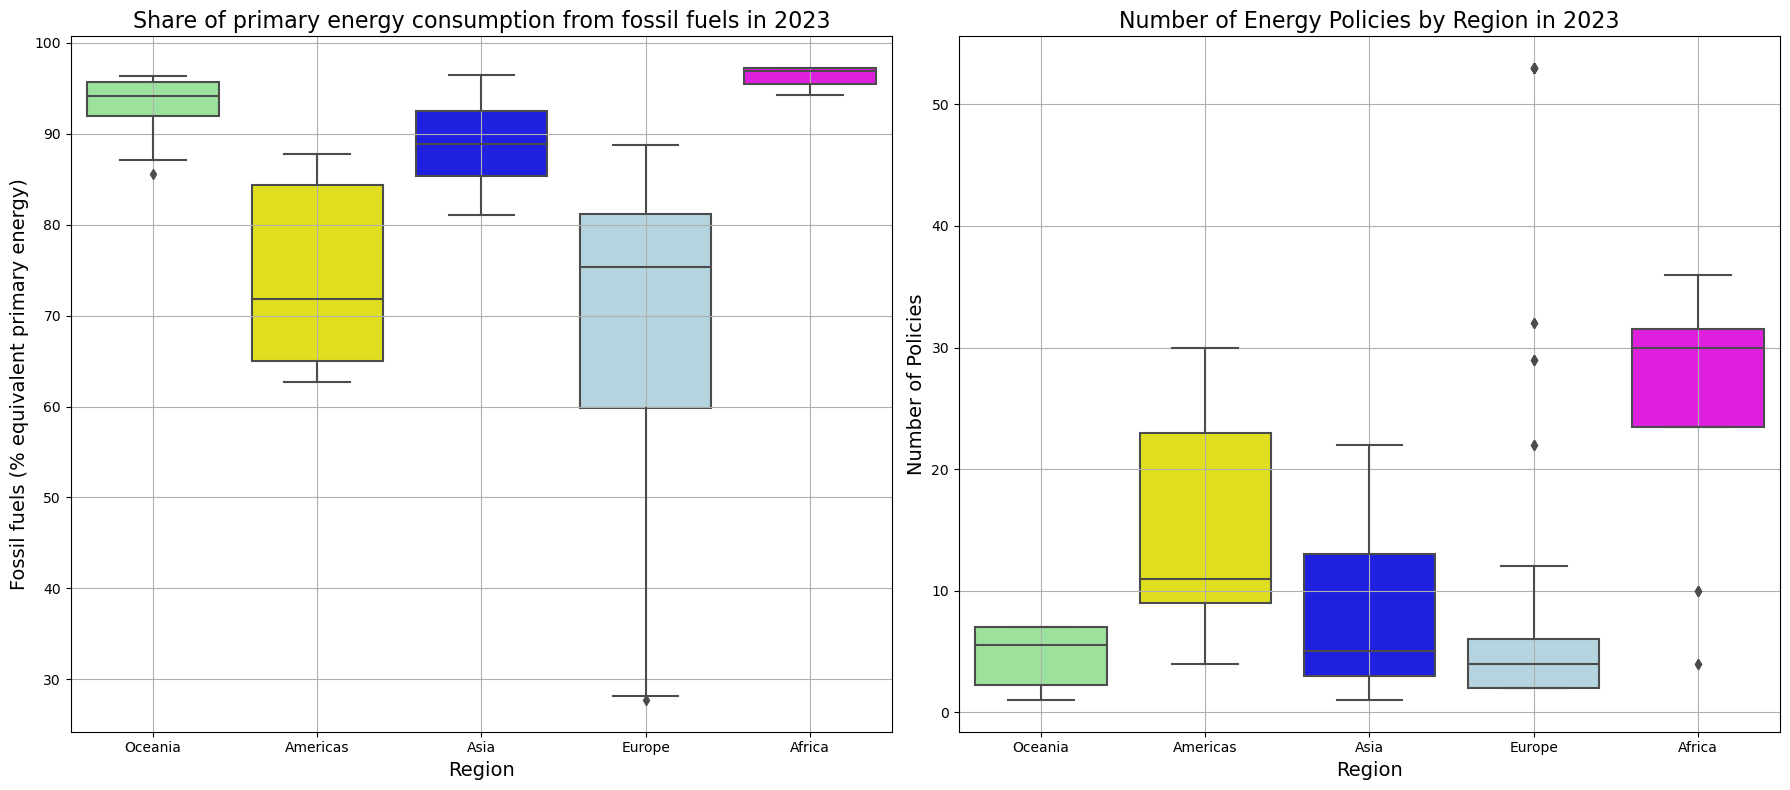

In [25]:
# Function to create the box plots for renewable energy share and policy count by region
def plot_boxplots_by_region(df):
    fig, axes = plt.subplots(1, 2, figsize=(18, 8))

    # Plot for renewable energy share
    sns.boxplot(
        data=df,
        x='region',
        y='Fossil fuels (% equivalent primary energy)',
        palette=region_colors_fixed,
        ax=axes[0]
    )
    axes[0].set_title('Share of primary energy consumption from fossil fuels in 2023', fontsize=16)
    axes[0].set_xlabel('Region', fontsize=14)
    axes[0].set_ylabel('Fossil fuels (% equivalent primary energy)', fontsize=14)
    axes[0].grid(True)

    # Plot for policy count
    sns.boxplot(
        data=df,
        x='region',
        y='policy_count',
        palette=region_colors_fixed,
        ax=axes[1]
    )
    axes[1].set_title('Number of Energy Policies by Region in 2023', fontsize=16)
    axes[1].set_xlabel('Region', fontsize=14)
    axes[1].set_ylabel('Number of Policies', fontsize=14)
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()

# Plot the box plots
plot_boxplots_by_region(df_combined)

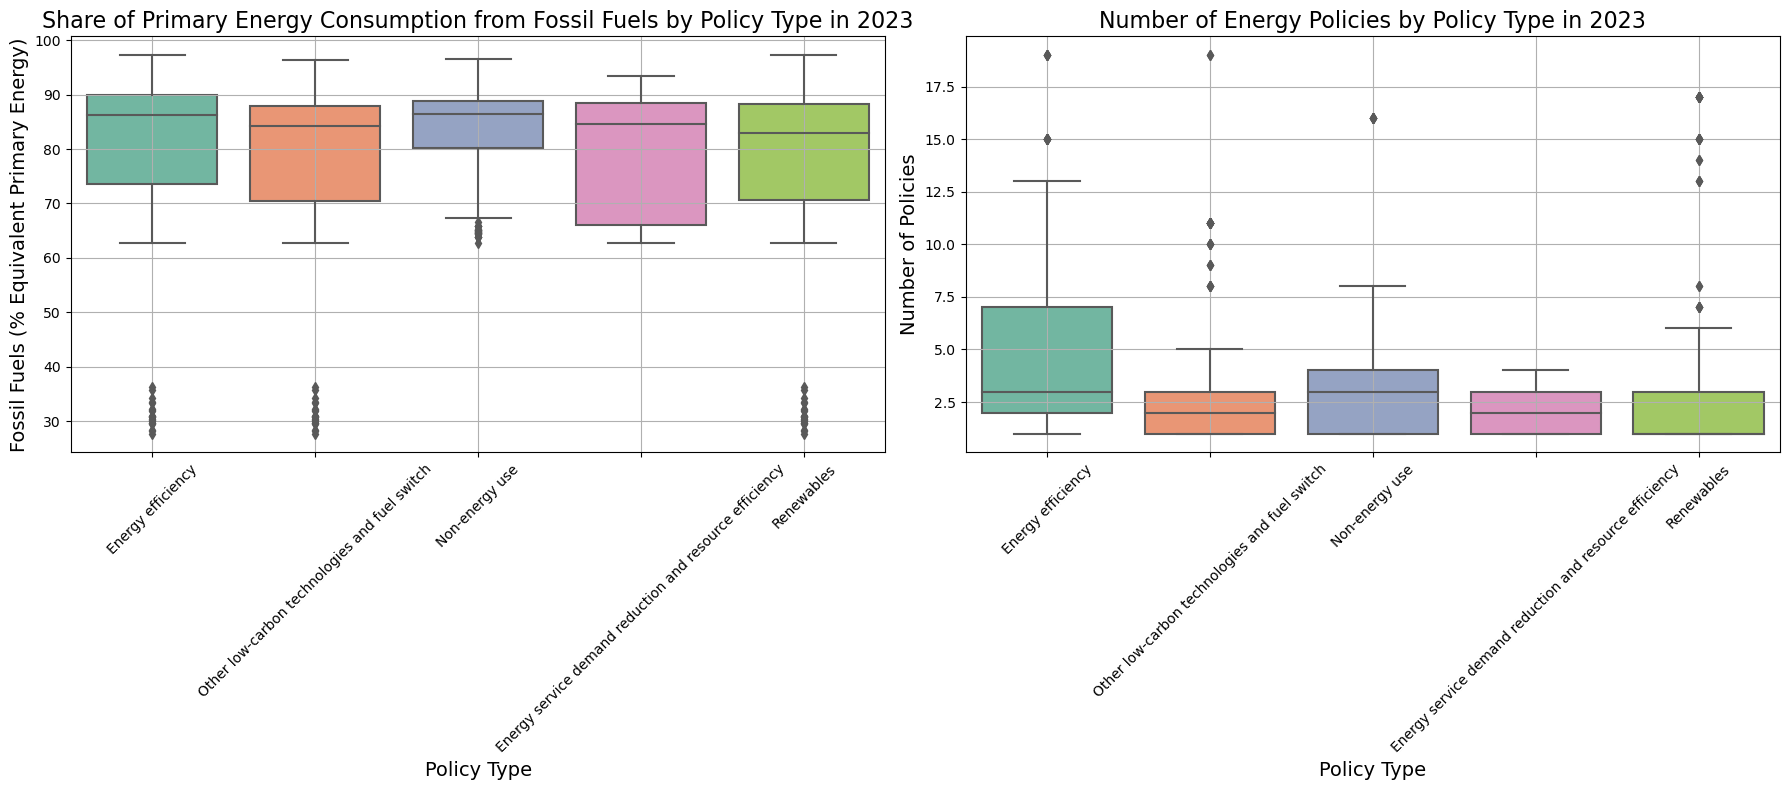

In [26]:
# Example of region_colors_fixed definition
# Assuming you have predefined colors for regions, you might need to define something similar for policy types.
# Here we'll just use a default color palette.

df_fossil_policies['policy_count'] = 1  # Add a column to count policies
policies_agg = df_fossil_policies.groupby(['country_iso', 'active_year', 'policy_type']).agg({'policy_count': 'sum'}).reset_index()

# Merge with the renewable energy consumption data
df_combined_policy_type = pd.merge(
    df_share_energy_consum,
    policies_agg,
    left_on=['Code', 'Year'],
    right_on=['country_iso', 'active_year']
)

df_combined = df_combined[df_combined["Year"] >= 2000]

policy_type_colors_fixed = sns.color_palette("Set2", n_colors=df_combined_policy_type['policy_type'].nunique())

# Function to create the box plots for renewable energy share and policy count by policy type
def plot_boxplots_by_policy_type(df):
    fig, axes = plt.subplots(1, 2, figsize=(18, 8))

    # Plot for renewable energy share
    sns.boxplot(
        data=df,
        x='policy_type',
        y='Fossil fuels (% equivalent primary energy)',
        palette=policy_type_colors_fixed,
        ax=axes[0]
    )
    axes[0].set_title('Share of Primary Energy Consumption from Fossil Fuels by Policy Type in 2023', fontsize=16)
    axes[0].set_xlabel('Policy Type', fontsize=14)
    axes[0].set_ylabel('Fossil Fuels (% Equivalent Primary Energy)', fontsize=14)
    axes[0].grid(True)
    axes[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

    # Plot for policy count
    sns.boxplot(
        data=df,
        x='policy_type',
        y='policy_count',
        palette=policy_type_colors_fixed,
        ax=axes[1]
    )
    axes[1].set_title('Number of Energy Policies by Policy Type in 2023', fontsize=16)
    axes[1].set_xlabel('Policy Type', fontsize=14)
    axes[1].set_ylabel('Number of Policies', fontsize=14)
    axes[1].grid(True)
    axes[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

    plt.tight_layout()
    plt.show()

# Plot the box plots
plot_boxplots_by_policy_type(df_combined_policy_type)

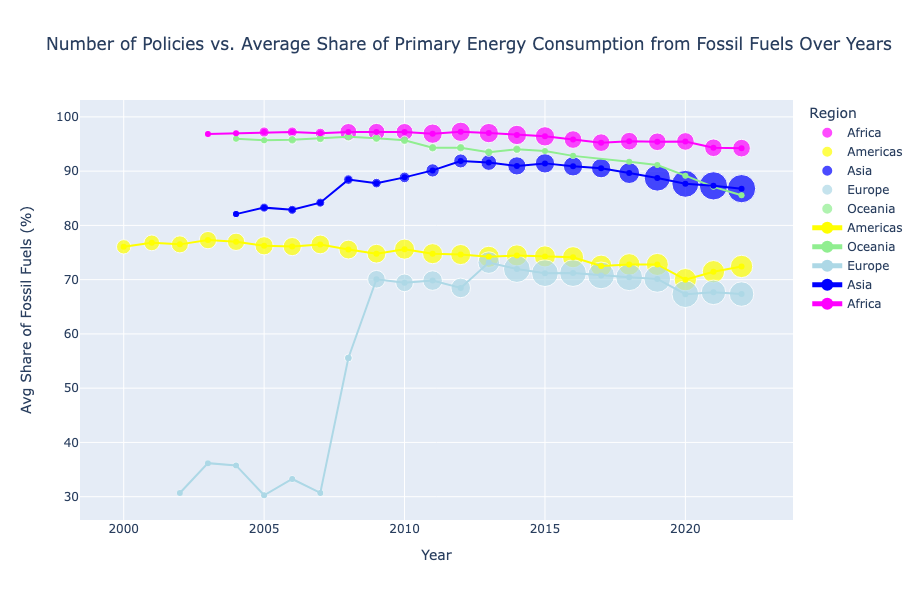

In [27]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Assuming df_combined is already prepared as per your provided code
# Aggregate the data by region and year
region_agg = df_combined.groupby(['region', 'Year']).agg({
    'policy_count': 'sum',  # Total number of policies
    'Fossil fuels (% equivalent primary energy)': 'mean'  # Average share of renewable energy consumption
}).reset_index()

# Rename the column for clarity
region_agg.rename(columns={'Fossil fuels (% equivalent primary energy)': 'Avg Share of Fossil Fuels'}, inplace=True)

# Define the custom color palette for each region
region_colors_fixed = {
    'Americas': 'yellow',
    'Oceania': 'lightgreen',
    'Europe': 'lightblue',
    'Asia': 'blue',
    'Africa': 'magenta'
}

# Function to plot number of policies vs. avg share of renewables over years by region
def plot_policies_vs_fossil_fuels_interactive(region_agg):
    # Create a scatter plot with lines
    fig = px.scatter(
        region_agg,
        x='Year',
        y='Avg Share of Fossil Fuels',
        color='region',
        size='policy_count',
        color_discrete_map=region_colors_fixed,
        title='Number of Policies vs. Average Share of Primary Energy Consumption from Fossil Fuels Over Years',
        labels={'policy_count': 'Number of Policies', 'Avg Share of Fossil Fuels': 'Avg Share of Fossil Fuels (%)'}
    )
    
    # Add lines for each region
    for region in region_colors_fixed.keys():
        region_data = region_agg[region_agg['region'] == region]
        fig.add_trace(go.Scatter(
            x=region_data['Year'],
            y=region_data['Avg Share of Fossil Fuels'],
            mode='lines+markers',
            name=region,
            marker=dict(color=region_colors_fixed[region]),
            line=dict(color=region_colors_fixed[region]),
            text=region_data['policy_count'],  # Hover text will show number of policies
            hovertemplate='Year: %{x}<br>Avg Share of Fossil Fuels: %{y:.2f}%<br>Number of Policies: %{text}<extra></extra>'
        ))
    
    # Update layout for better aesthetics
    fig.update_layout(
        xaxis_title='Year',
        yaxis_title='Avg Share of Fossil Fuels (%)',
        legend_title='Region',
        hovermode='x unified',
        height=600
    )
    
    fig.show()

# Call the plotting function with the refined approach
plot_policies_vs_fossil_fuels_interactive(region_agg)

#### Number of Fossil Fuel Policies vs Share of electricity production from fossil fuels

In [ ]:
df_share_energy_prod = pd.read_csv('../data/energy/share-electricity-fossil-fuels.csv')
df_share_energy_prod = df_share_energy_prod.dropna()
df_share_energy_prod.head()

Entity Code  Year  Fossil fuels - % electricity
24  Afghanistan  AFG  2000                     35.416668
25  Afghanistan  AFG  2001                     27.536232
26  Afghanistan  AFG  2002                     21.126762
27  Afghanistan  AFG  2003                     30.769230
28  Afghanistan  AFG  2004                     29.113924

In [29]:
# Define the custom color palette for each region
region_colors_fixed = {
    'Americas': 'yellow',
    'Oceania': 'lightgreen',
    'Europe': 'lightblue',
    'Asia': 'blue',
    'Africa': 'magenta'
}

# Prepare the data
df_fossil_policies['policy_count'] = 1  # Add a column to count policies
policies_agg = df_fossil_policies.groupby(['country_iso', 'active_year', 'region']).agg({'policy_count': 'sum'}).reset_index()

# Merge with the renewable energy consumption data
df_combined = pd.merge(
    df_share_energy_prod,
    policies_agg,
    left_on=['Code', 'Year'],
    right_on=['country_iso', 'active_year']
)

df_combined = df_combined[df_combined["Year"] >= 2000]

# Function to plot the correlation with fixed region colors
def plot_correlation_fixed_colors(df, year):
    # Filter the data for the selected year
    df_year = df[df['Year'] == year]
    
    # Create the scatter plot
    plt.figure(figsize=(10, 6))
    scatter_plot = sns.scatterplot(
        data=df_year,
        x='policy_count',
        y='Fossil fuels - % electricity',
        hue='region',
        palette=region_colors_fixed,
        s=100
    )
    
    # Add a regression line
    sns.regplot(
        data=df_year,
        x='policy_count',
        y='Fossil fuels - % electricity',
        scatter=False,
        ax=scatter_plot
    )
    
    # Calculate and display correlation
    correlation = df_year['policy_count'].corr(df_year['Fossil fuels - % electricity'])
    plt.title(f'Correlation between Number of Policies and Number of Energy Policies vs Share of electricity production from fossil fuels in {year}\nCorrelation: {correlation:.2f}', fontsize=14)
    
    plt.xlabel('Number of Policies')
    plt.ylabel('Fossil fuels - % electricity')
    plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.show()

# Create a dropdown widget for year selection
year_selector_fixed_colors = widgets.IntSlider(
    min=df_combined['Year'].min(),
    max=df_combined['Year'].max(),
    step=1,
    value=df_combined['Year'].min(),
    description='Year:'
)

# Link the dropdown to the plot function with fixed colors
def interactive_plot_fixed_colors(year):
    plot_correlation_fixed_colors(df_combined, year)

# Display the interactive plot
widgets.interactive(interactive_plot_fixed_colors, year=year_selector_fixed_colors)

interactive(children=(IntSlider(value=2000, description='Year:', max=2023, min=2000), Output()), _dom_classes=…

In [30]:
calculate_and_store_data(df_combined, f'fossil_production', 'Fossil fuels - % electricity')

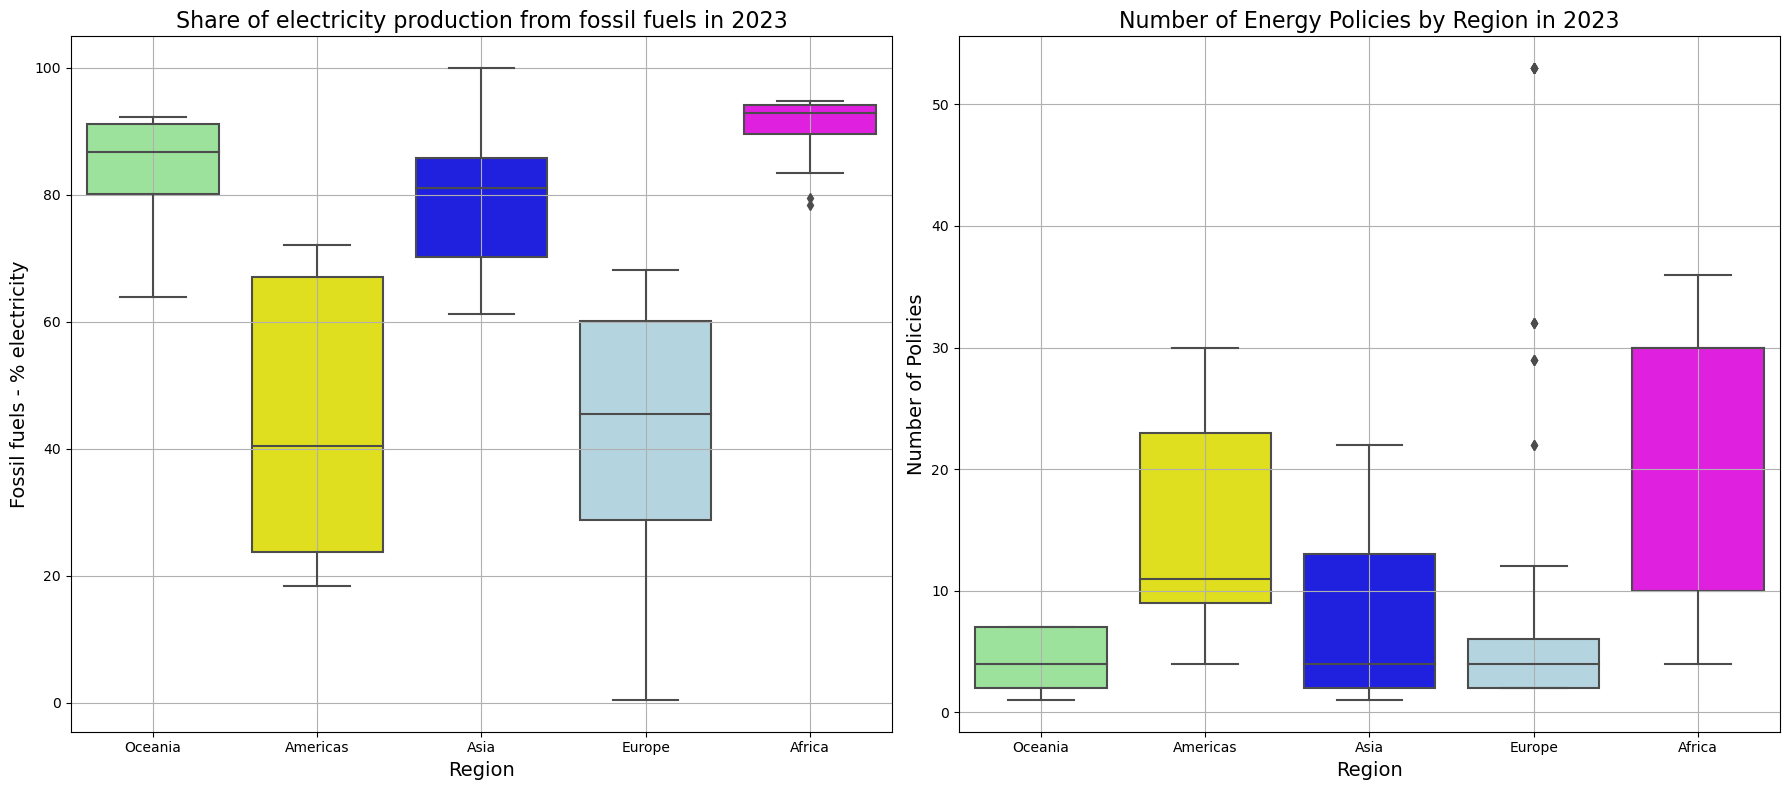

In [31]:
# Function to create the box plots for renewable energy share and policy count by region
def plot_boxplots_by_region(df):
    fig, axes = plt.subplots(1, 2, figsize=(18, 8))

    # Plot for renewable energy share
    sns.boxplot(
        data=df,
        x='region',
        y='Fossil fuels - % electricity',
        palette=region_colors_fixed,
        ax=axes[0]
    )
    axes[0].set_title('Share of electricity production from fossil fuels in 2023', fontsize=16)
    axes[0].set_xlabel('Region', fontsize=14)
    axes[0].set_ylabel('Fossil fuels - % electricity', fontsize=14)
    axes[0].grid(True)

    # Plot for policy count
    sns.boxplot(
        data=df,
        x='region',
        y='policy_count',
        palette=region_colors_fixed,
        ax=axes[1]
    )
    axes[1].set_title('Number of Energy Policies by Region in 2023', fontsize=16)
    axes[1].set_xlabel('Region', fontsize=14)
    axes[1].set_ylabel('Number of Policies', fontsize=14)
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()

# Plot the box plots
plot_boxplots_by_region(df_combined)

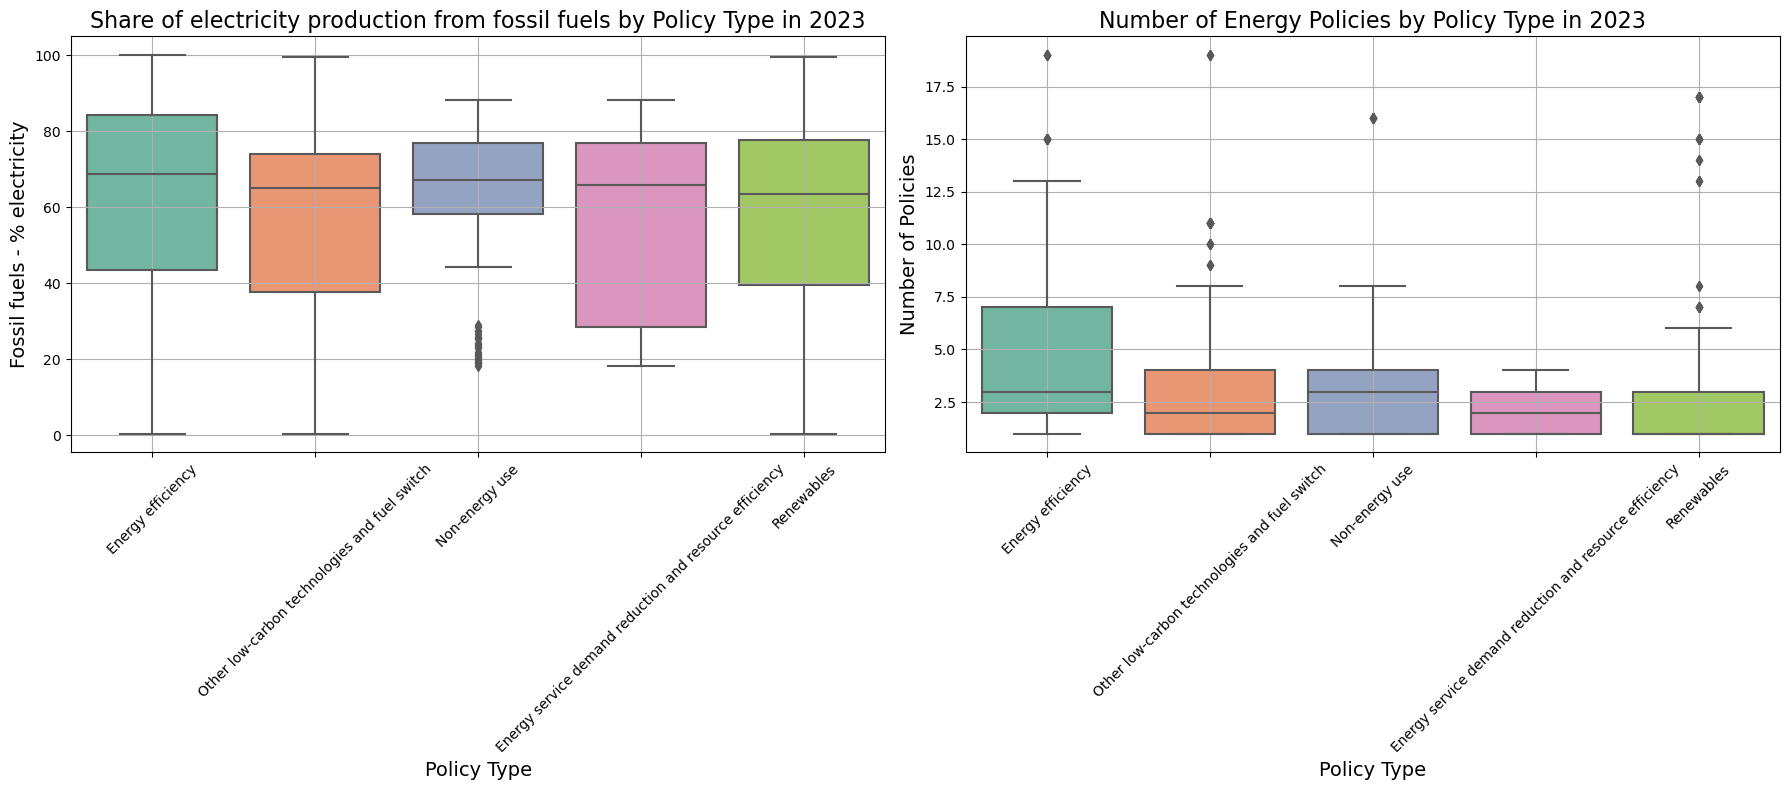

In [32]:
# Example of region_colors_fixed definition
# Assuming you have predefined colors for regions, you might need to define something similar for policy types.
# Here we'll just use a default color palette.

df_fossil_policies['policy_count'] = 1  # Add a column to count policies
policies_agg = df_fossil_policies.groupby(['country_iso', 'active_year', 'policy_type']).agg({'policy_count': 'sum'}).reset_index()

# Merge with the renewable energy consumption data
df_combined_policy_type = pd.merge(
    df_share_energy_prod,
    policies_agg,
    left_on=['Code', 'Year'],
    right_on=['country_iso', 'active_year']
)

df_combined = df_combined[df_combined["Year"] >= 2000]

policy_type_colors_fixed = sns.color_palette("Set2", n_colors=df_combined_policy_type['policy_type'].nunique())

# Function to create the box plots for renewable energy share and policy count by policy type
def plot_boxplots_by_policy_type(df):
    fig, axes = plt.subplots(1, 2, figsize=(18, 8))

    # Plot for renewable energy share
    sns.boxplot(
        data=df,
        x='policy_type',
        y='Fossil fuels - % electricity',
        palette=policy_type_colors_fixed,
        ax=axes[0]
    )
    axes[0].set_title('Share of electricity production from fossil fuels by Policy Type in 2023', fontsize=16)
    axes[0].set_xlabel('Policy Type', fontsize=14)
    axes[0].set_ylabel('Fossil fuels - % electricity', fontsize=14)
    axes[0].grid(True)
    axes[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

    # Plot for policy count
    sns.boxplot(
        data=df,
        x='policy_type',
        y='policy_count',
        palette=policy_type_colors_fixed,
        ax=axes[1]
    )
    axes[1].set_title('Number of Energy Policies by Policy Type in 2023', fontsize=16)
    axes[1].set_xlabel('Policy Type', fontsize=14)
    axes[1].set_ylabel('Number of Policies', fontsize=14)
    axes[1].grid(True)
    axes[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

    plt.tight_layout()
    plt.show()

# Plot the box plots
plot_boxplots_by_policy_type(df_combined_policy_type)

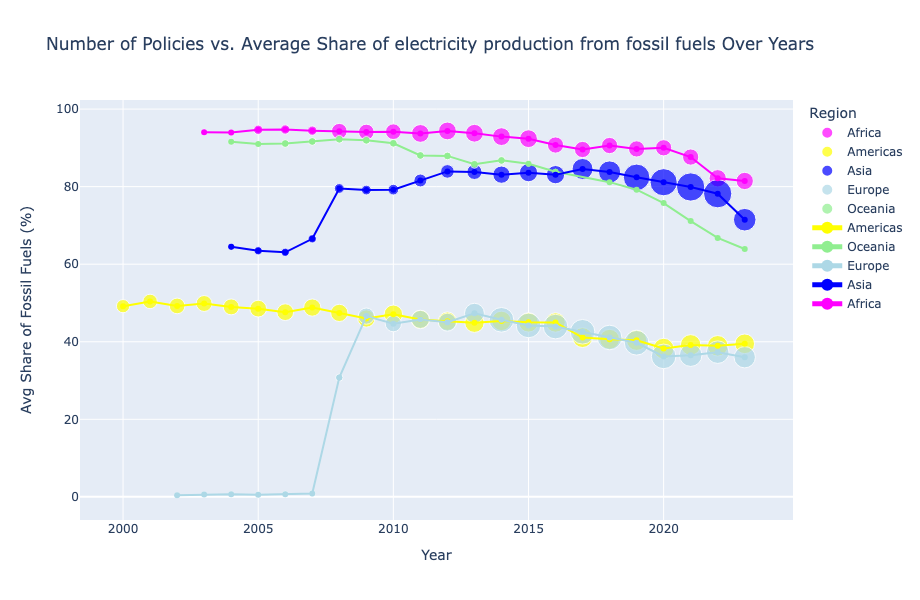

In [33]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Assuming df_combined is already prepared as per your provided code
# Aggregate the data by region and year
region_agg = df_combined.groupby(['region', 'Year']).agg({
    'policy_count': 'sum',  # Total number of policies
    'Fossil fuels - % electricity': 'mean'  # Average share of renewable energy consumption
}).reset_index()

# Rename the column for clarity
region_agg.rename(columns={'Fossil fuels - % electricity': 'Avg Share of Fossil Fuels'}, inplace=True)

# Define the custom color palette for each region
region_colors_fixed = {
    'Americas': 'yellow',
    'Oceania': 'lightgreen',
    'Europe': 'lightblue',
    'Asia': 'blue',
    'Africa': 'magenta'
}

# Function to plot number of policies vs. avg share of renewables over years by region
def plot_policies_vs_fossil_fuels_interactive(region_agg):
    # Create a scatter plot with lines
    fig = px.scatter(
        region_agg,
        x='Year',
        y='Avg Share of Fossil Fuels',
        color='region',
        size='policy_count',
        color_discrete_map=region_colors_fixed,
        title='Number of Policies vs. Average Share of electricity production from fossil fuels Over Years',
        labels={'policy_count': 'Number of Policies', 'Avg Share of Fossil Fuels': 'Avg Share of Fossil Fuels (%)'}
    )
    
    # Add lines for each region
    for region in region_colors_fixed.keys():
        region_data = region_agg[region_agg['region'] == region]
        fig.add_trace(go.Scatter(
            x=region_data['Year'],
            y=region_data['Avg Share of Fossil Fuels'],
            mode='lines+markers',
            name=region,
            marker=dict(color=region_colors_fixed[region]),
            line=dict(color=region_colors_fixed[region]),
            text=region_data['policy_count'],  # Hover text will show number of policies
            hovertemplate='Year: %{x}<br>Avg Share of Fossil Fuels: %{y:.2f}%<br>Number of Policies: %{text}<extra></extra>'
        ))
    
    # Update layout for better aesthetics
    fig.update_layout(
        xaxis_title='Year',
        yaxis_title='Avg Share of Fossil Fuels (%)',
        legend_title='Region',
        hovermode='x unified',
        height=600
    )
    
    fig.show()

# Call the plotting function with the refined approach
plot_policies_vs_fossil_fuels_interactive(region_agg)

#### Number of Nuclear Energy Policies vs Share of primary energy consumption from nuclear

In [34]:
df_nuclear_policies = df_sub[df_sub["sector"] == "Nuclear"]
df_nuclear_policies.head()

country_iso country_update  \
8         ARE         Annual   
8         ARE         Annual   
8         ARE         Annual   
8         ARE         Annual   
8         ARE         Annual   

                                        policy_title jurisdiction  \
8  Energy Strategy for 2050 United Arab Emirates ...      Country   
8  Energy Strategy for 2050 United Arab Emirates ...      Country   
8  Energy Strategy for 2050 United Arab Emirates ...      Country   
8  Energy Strategy for 2050 United Arab Emirates ...      Country   
8  Energy Strategy for 2050 United Arab Emirates ...      Country   

                country   policy_instrument   sector  \
8  United Arab Emirates      Policy support  Nuclear   
8  United Arab Emirates      Policy support  Nuclear   
8  United Arab Emirates      Policy support  Nuclear   
8  United Arab Emirates  Strategic planning  Nuclear   
8  United Arab Emirates  Strategic planning  Nuclear   

                                  policy_description  \
8  The strategy aims to diversify the energy matr...   
8  The strategy aims to diversify the energy matr...   
8  The strategy aims to diversify the energy matr...   
8  The strategy aims to diversify the energy matr...   
8  The strategy aims to diversify the energy matr...   

                                     policy_type policy_status  ...  VarID  \
8                              Energy efficiency      In force  ...      2   
8                                     Renewables      In force  ...      2   
8  Other low-carbon technologies and fuel switch      In force  ...      2   
8                              Energy efficiency      In force  ...      2   
8                                     Renewables      In force  ...      2   

   Variant  Time MidPeriod   PopMale PopFemale  PopTotal  PopDensity  \
8   Medium  2023    2023.5  6970.756  3194.394  10165.15     121.593   
8   Medium  2023    2023.5  6970.756  3194.394  10165.15     121.593   
8   Medium  2023    2023.5  6970.756  3194.394  10165.15     121.593   
8   Medium  2023    2023.5  6970.756  3194.394  10165.15     121.593   
8   Medium  2023    2023.5  6970.756  3194.394  10165.15     121.593   

                   sector_group         policy_instrument_group  
8  Energy Production and Supply  Support and Strategic Measures  
8  Energy Production and Supply  Support and Strategic Measures  
8  Energy Production and Supply  Support and Strategic Measures  
8  Energy Production and Supply  Support and Strategic Measures  
8  Energy Production and Supply  Support and Strategic Measures  

[5 rows x 38 columns]

In [ ]:
df_share_energy_consum = pd.read_csv('../data/energy/nuclear-primary-energy.csv')
df_share_energy_consum = df_share_energy_consum.dropna()
df_share_energy_consum.head()

Entity Code  Year  Nuclear (% equivalent primary energy)
116  Algeria  DZA  1965                                    0.0
117  Algeria  DZA  1966                                    0.0
118  Algeria  DZA  1967                                    0.0
119  Algeria  DZA  1968                                    0.0
120  Algeria  DZA  1969                                    0.0

In [36]:
# Define the custom color palette for each region
region_colors_fixed = {
    'Americas': 'yellow',
    'Oceania': 'lightgreen',
    'Europe': 'lightblue',
    'Asia': 'blue',
    'Africa': 'magenta'
}

# Prepare the data
df_nuclear_policies['policy_count'] = 1  # Add a column to count policies
policies_agg = df_nuclear_policies.groupby(['country_iso', 'active_year', 'region']).agg({'policy_count': 'sum'}).reset_index()

# Merge with the renewable energy consumption data
df_combined = pd.merge(
    df_share_energy_consum,
    policies_agg,
    left_on=['Code', 'Year'],
    right_on=['country_iso', 'active_year']
)

df_combined = df_combined[df_combined["Year"] >= 2000]

# Function to plot the correlation with fixed region colors
def plot_correlation_fixed_colors(df, year):
    # Filter the data for the selected year
    df_year = df[df['Year'] == year]
    
    # Create the scatter plot
    plt.figure(figsize=(10, 6))
    scatter_plot = sns.scatterplot(
        data=df_year,
        x='policy_count',
        y='Nuclear (% equivalent primary energy)',
        hue='region',
        palette=region_colors_fixed,
        s=100
    )
    
    # Add a regression line
    sns.regplot(
        data=df_year,
        x='policy_count',
        y='Nuclear (% equivalent primary energy)',
        scatter=False,
        ax=scatter_plot
    )
    
    # Calculate and display correlation
    correlation = df_year['policy_count'].corr(df_year['Nuclear (% equivalent primary energy)'])
    plt.title(f'Correlation between Number of Policies and Share of primary energy consumption from nuclear in {year}\nCorrelation: {correlation:.2f}', fontsize=14)
    
    plt.xlabel('Number of Policies')
    plt.ylabel('Nuclear (% equivalent primary energy)')
    plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.show()

# Create a dropdown widget for year selection
year_selector_fixed_colors = widgets.IntSlider(
    min=df_combined['Year'].min(),
    max=df_combined['Year'].max(),
    step=1,
    value=df_combined['Year'].min(),
    description='Year:'
)

# Link the dropdown to the plot function with fixed colors
def interactive_plot_fixed_colors(year):
    plot_correlation_fixed_colors(df_combined, year)

# Display the interactive plot
widgets.interactive(interactive_plot_fixed_colors, year=year_selector_fixed_colors)

interactive(children=(IntSlider(value=2000, description='Year:', max=2022, min=2000), Output()), _dom_classes=…

In [37]:
calculate_and_store_data(df_combined, f'nuclear_consumption', 'Nuclear (% equivalent primary energy)')

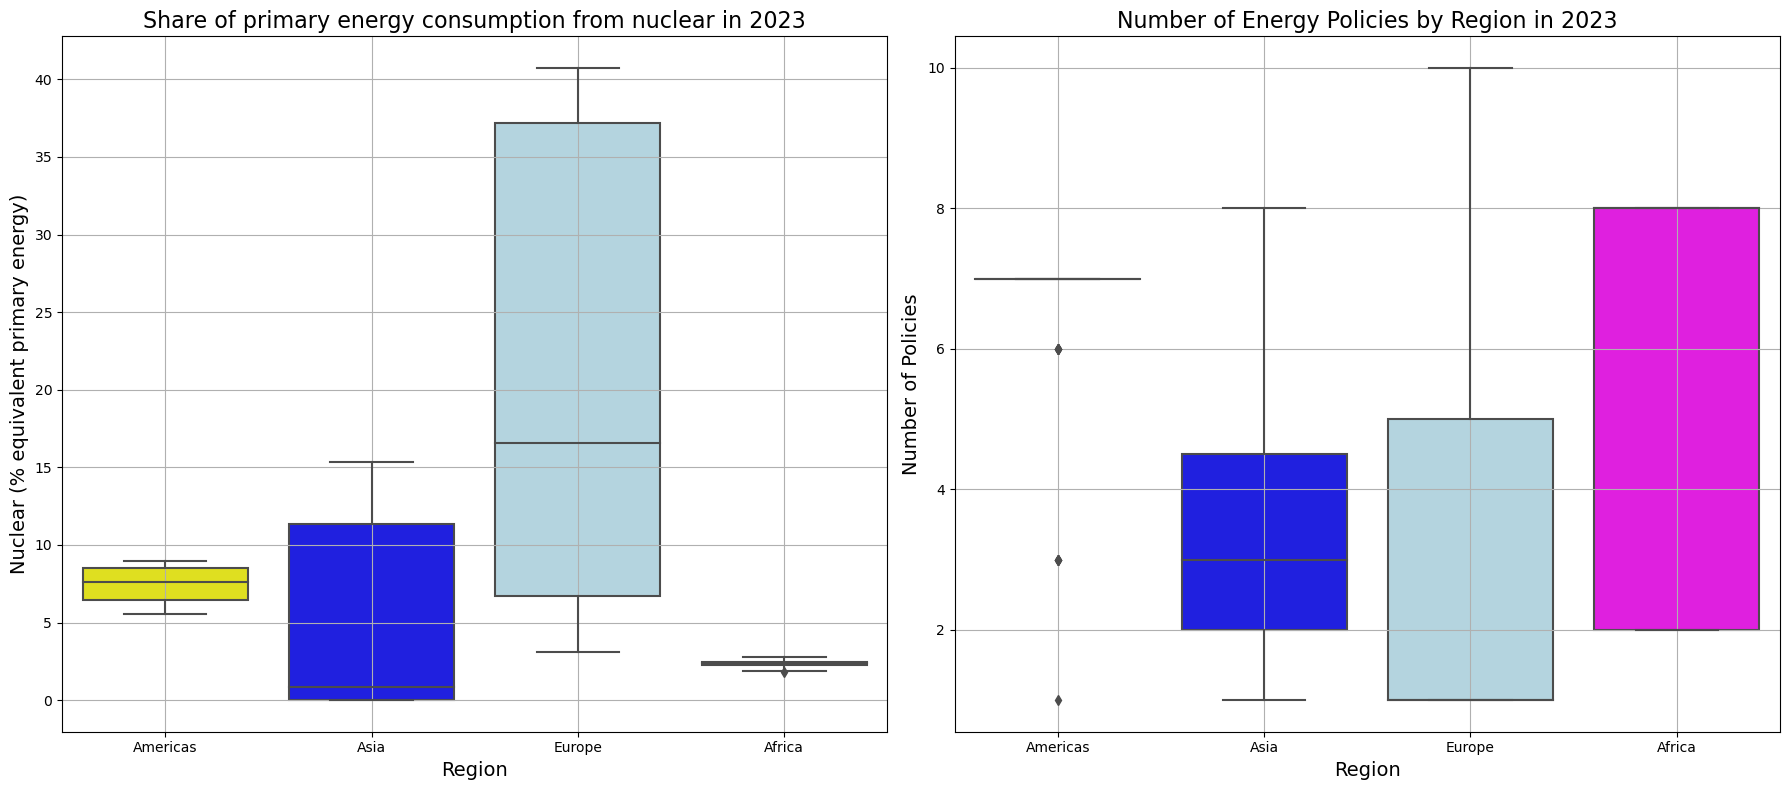

In [38]:
# Function to create the box plots for renewable energy share and policy count by region
def plot_boxplots_by_region(df):
    fig, axes = plt.subplots(1, 2, figsize=(18, 8))

    # Plot for renewable energy share
    sns.boxplot(
        data=df,
        x='region',
        y='Nuclear (% equivalent primary energy)',
        palette=region_colors_fixed,
        ax=axes[0]
    )
    axes[0].set_title('Share of primary energy consumption from nuclear in 2023', fontsize=16)
    axes[0].set_xlabel('Region', fontsize=14)
    axes[0].set_ylabel('Nuclear (% equivalent primary energy)', fontsize=14)
    axes[0].grid(True)

    # Plot for policy count
    sns.boxplot(
        data=df,
        x='region',
        y='policy_count',
        palette=region_colors_fixed,
        ax=axes[1]
    )
    axes[1].set_title('Number of Energy Policies by Region in 2023', fontsize=16)
    axes[1].set_xlabel('Region', fontsize=14)
    axes[1].set_ylabel('Number of Policies', fontsize=14)
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()

# Plot the box plots
plot_boxplots_by_region(df_combined)

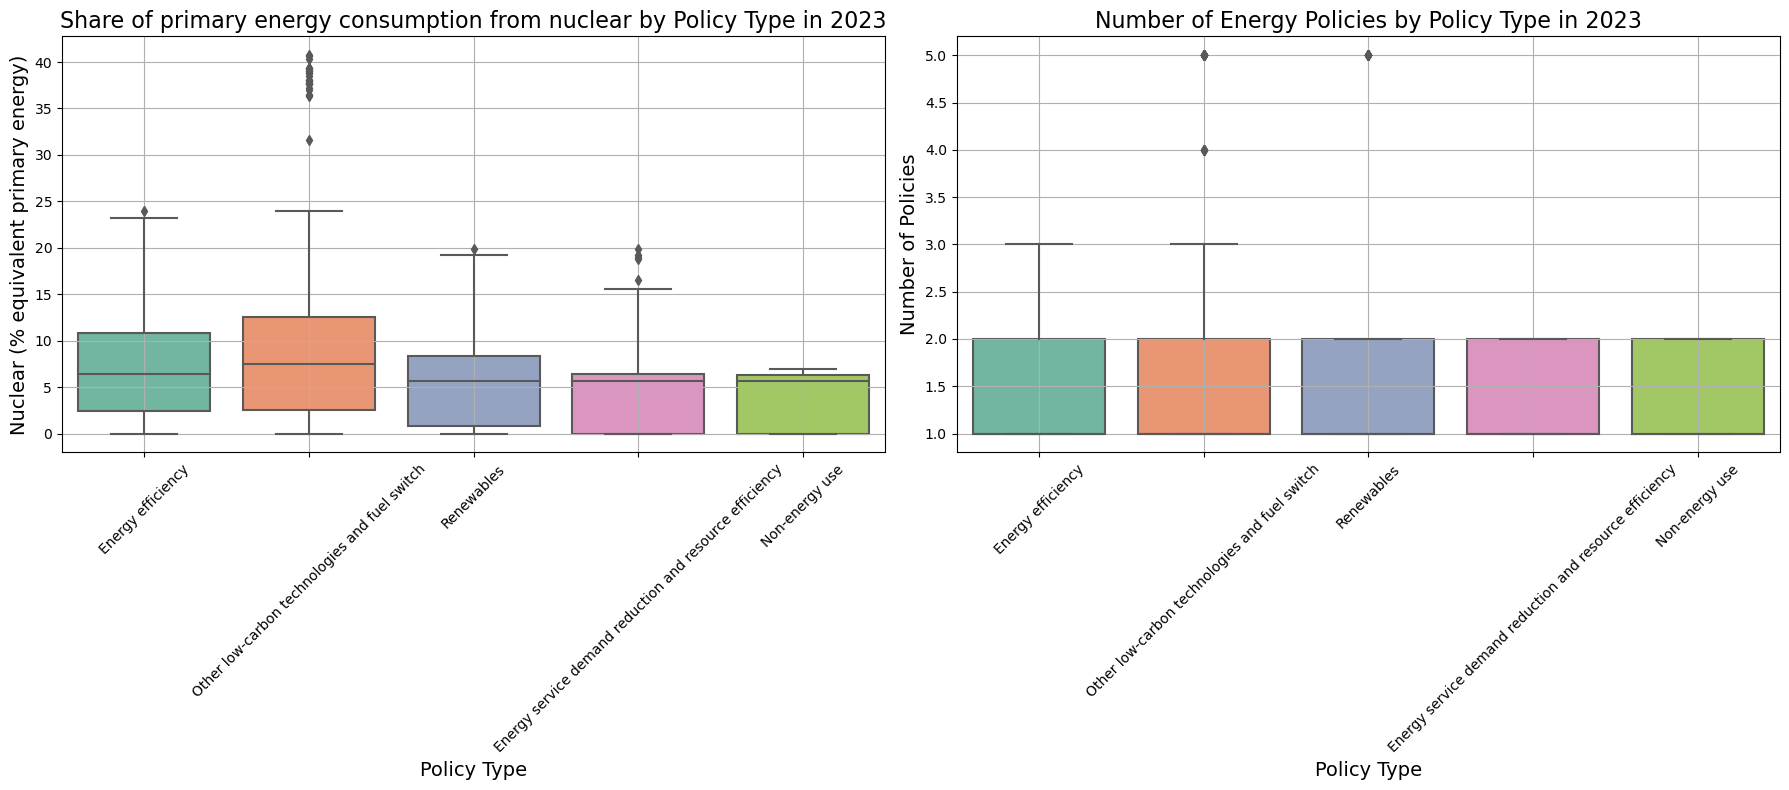

In [39]:
# Example of region_colors_fixed definition
# Assuming you have predefined colors for regions, you might need to define something similar for policy types.
# Here we'll just use a default color palette.

df_fossil_policies['policy_count'] = 1  # Add a column to count policies
policies_agg = df_nuclear_policies.groupby(['country_iso', 'active_year', 'policy_type']).agg({'policy_count': 'sum'}).reset_index()

# Merge with the renewable energy consumption data
df_combined_policy_type = pd.merge(
    df_share_energy_consum,
    policies_agg,
    left_on=['Code', 'Year'],
    right_on=['country_iso', 'active_year']
)

df_combined = df_combined[df_combined["Year"] >= 2000]

policy_type_colors_fixed = sns.color_palette("Set2", n_colors=df_combined_policy_type['policy_type'].nunique())

# Function to create the box plots for renewable energy share and policy count by policy type
def plot_boxplots_by_policy_type(df):
    fig, axes = plt.subplots(1, 2, figsize=(18, 8))

    # Plot for renewable energy share
    sns.boxplot(
        data=df,
        x='policy_type',
        y='Nuclear (% equivalent primary energy)',
        palette=policy_type_colors_fixed,
        ax=axes[0]
    )
    axes[0].set_title('Share of primary energy consumption from nuclear by Policy Type in 2023', fontsize=16)
    axes[0].set_xlabel('Policy Type', fontsize=14)
    axes[0].set_ylabel('Nuclear (% equivalent primary energy)', fontsize=14)
    axes[0].grid(True)
    axes[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

    # Plot for policy count
    sns.boxplot(
        data=df,
        x='policy_type',
        y='policy_count',
        palette=policy_type_colors_fixed,
        ax=axes[1]
    )
    axes[1].set_title('Number of Energy Policies by Policy Type in 2023', fontsize=16)
    axes[1].set_xlabel('Policy Type', fontsize=14)
    axes[1].set_ylabel('Number of Policies', fontsize=14)
    axes[1].grid(True)
    axes[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

    plt.tight_layout()
    plt.show()

# Plot the box plots
plot_boxplots_by_policy_type(df_combined_policy_type)

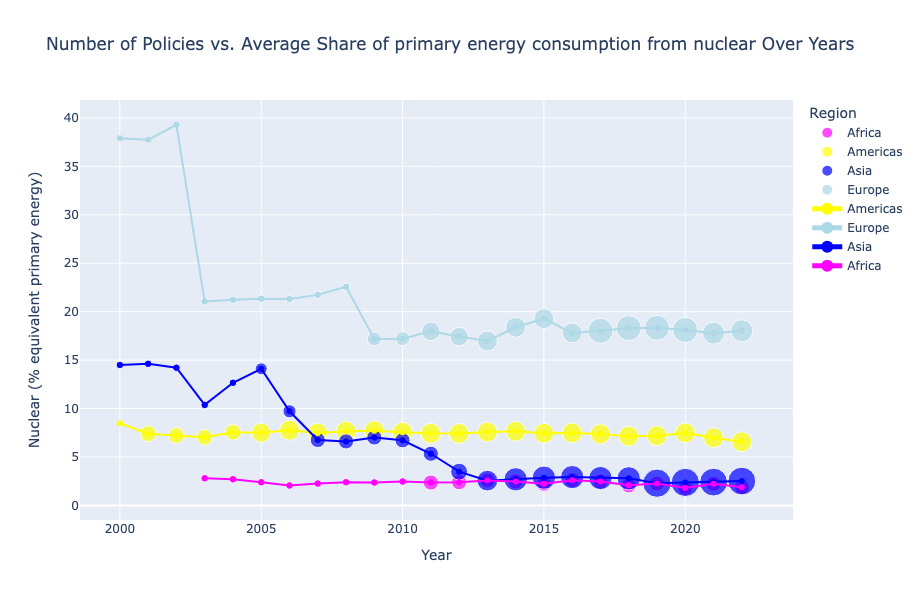

In [40]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Assuming df_combined is already prepared as per your provided code
# Aggregate the data by region and year
region_agg = df_combined.groupby(['region', 'Year']).agg({
    'policy_count': 'sum',  # Total number of policies
    'Nuclear (% equivalent primary energy)': 'mean'  # Average share of renewable energy consumption
}).reset_index()

# Rename the column for clarity
# region_agg.rename(columns={'Nuclear (% equivalent primary energy)': 'Avg Share of Fossil Fuels'}, inplace=True)

# Define the custom color palette for each region
region_colors_fixed = {
    'Americas': 'yellow',
    'Oceania': 'lightgreen',
    'Europe': 'lightblue',
    'Asia': 'blue',
    'Africa': 'magenta'
}

# Function to plot number of policies vs. avg share of renewables over years by region
def plot_policies_vs_nuclear_interactive(region_agg):
    # Create a scatter plot with lines
    fig = px.scatter(
        region_agg,
        x='Year',
        y='Nuclear (% equivalent primary energy)',
        color='region',
        size='policy_count',
        color_discrete_map=region_colors_fixed,
        title='Number of Policies vs. Average Share of primary energy consumption from nuclear Over Years',
        labels={'policy_count': 'Number of Policies', 'Nuclear (% equivalent primary energy)' :'Nuclear (% equivalent primary energy)'}
    )
    
    # Add lines for each region
    for region in region_colors_fixed.keys():
        region_data = region_agg[region_agg['region'] == region]
        fig.add_trace(go.Scatter(
            x=region_data['Year'],
            y=region_data['Nuclear (% equivalent primary energy)'],
            mode='lines+markers',
            name=region,
            marker=dict(color=region_colors_fixed[region]),
            line=dict(color=region_colors_fixed[region]),
            text=region_data['policy_count'],  # Hover text will show number of policies
            hovertemplate='Year: %{x}<br>Avg Share of Nuclear: %{y:.2f}%<br>Number of Policies: %{text}<extra></extra>'
        ))
    
    # Update layout for better aesthetics
    fig.update_layout(
        xaxis_title='Year',
        yaxis_title='Nuclear (% equivalent primary energy)',
        legend_title='Region',
        hovermode='x unified',
        height=600
    )
    
    fig.show()

# Call the plotting function with the refined approach
plot_policies_vs_nuclear_interactive(region_agg)

#### Number of Nuclear Energy Policies vs Share of electricity production from nuclear

In [ ]:
df_share_energy_prod = pd.read_csv('../data/energy/share-electricity-nuclear.csv')
df_share_energy_prod = df_share_energy_prod.dropna()
df_share_energy_prod.head()

Entity Code  Year  Nuclear - % electricity
24  Afghanistan  AFG  2000                      0.0
25  Afghanistan  AFG  2001                      0.0
26  Afghanistan  AFG  2002                      0.0
27  Afghanistan  AFG  2003                      0.0
28  Afghanistan  AFG  2004                      0.0

In [42]:
# Define the custom color palette for each region
region_colors_fixed = {
    'Americas': 'yellow',
    'Oceania': 'lightgreen',
    'Europe': 'lightblue',
    'Asia': 'blue',
    'Africa': 'magenta'
}

# Prepare the data
df_fossil_policies['policy_count'] = 1  # Add a column to count policies
policies_agg = df_fossil_policies.groupby(['country_iso', 'active_year', 'region']).agg({'policy_count': 'sum'}).reset_index()

# Merge with the renewable energy consumption data
df_combined = pd.merge(
    df_share_energy_prod,
    policies_agg,
    left_on=['Code', 'Year'],
    right_on=['country_iso', 'active_year']
)

df_combined = df_combined[df_combined["Year"] >= 2000]

# Function to plot the correlation with fixed region colors
def plot_correlation_fixed_colors(df, year):
    # Filter the data for the selected year
    df_year = df[df['Year'] == year]
    
    # Create the scatter plot
    plt.figure(figsize=(10, 6))
    scatter_plot = sns.scatterplot(
        data=df_year,
        x='policy_count',
        y='Nuclear - % electricity',
        hue='region',
        palette=region_colors_fixed,
        s=100
    )
    
    # Add a regression line
    sns.regplot(
        data=df_year,
        x='policy_count',
        y='Nuclear - % electricity',
        scatter=False,
        ax=scatter_plot
    )
    
    # Calculate and display correlation
    correlation = df_year['policy_count'].corr(df_year['Nuclear - % electricity'])
    plt.title(f'Correlation between Number of Policies and Number of Energy Policies vs Share of electricity production from nuclear in {year}\nCorrelation: {correlation:.2f}', fontsize=14)
    
    plt.xlabel('Number of Policies')
    plt.ylabel('Nuclear - % electricity')
    plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.show()

# Create a dropdown widget for year selection
year_selector_fixed_colors = widgets.IntSlider(
    min=df_combined['Year'].min(),
    max=df_combined['Year'].max(),
    step=1,
    value=df_combined['Year'].min(),
    description='Year:'
)

# Link the dropdown to the plot function with fixed colors
def interactive_plot_fixed_colors(year):
    plot_correlation_fixed_colors(df_combined, year)

# Display the interactive plot
widgets.interactive(interactive_plot_fixed_colors, year=year_selector_fixed_colors)

interactive(children=(IntSlider(value=2000, description='Year:', max=2023, min=2000), Output()), _dom_classes=…

In [43]:
calculate_and_store_data(df_combined, f'nuclear_production', 'Nuclear - % electricity')

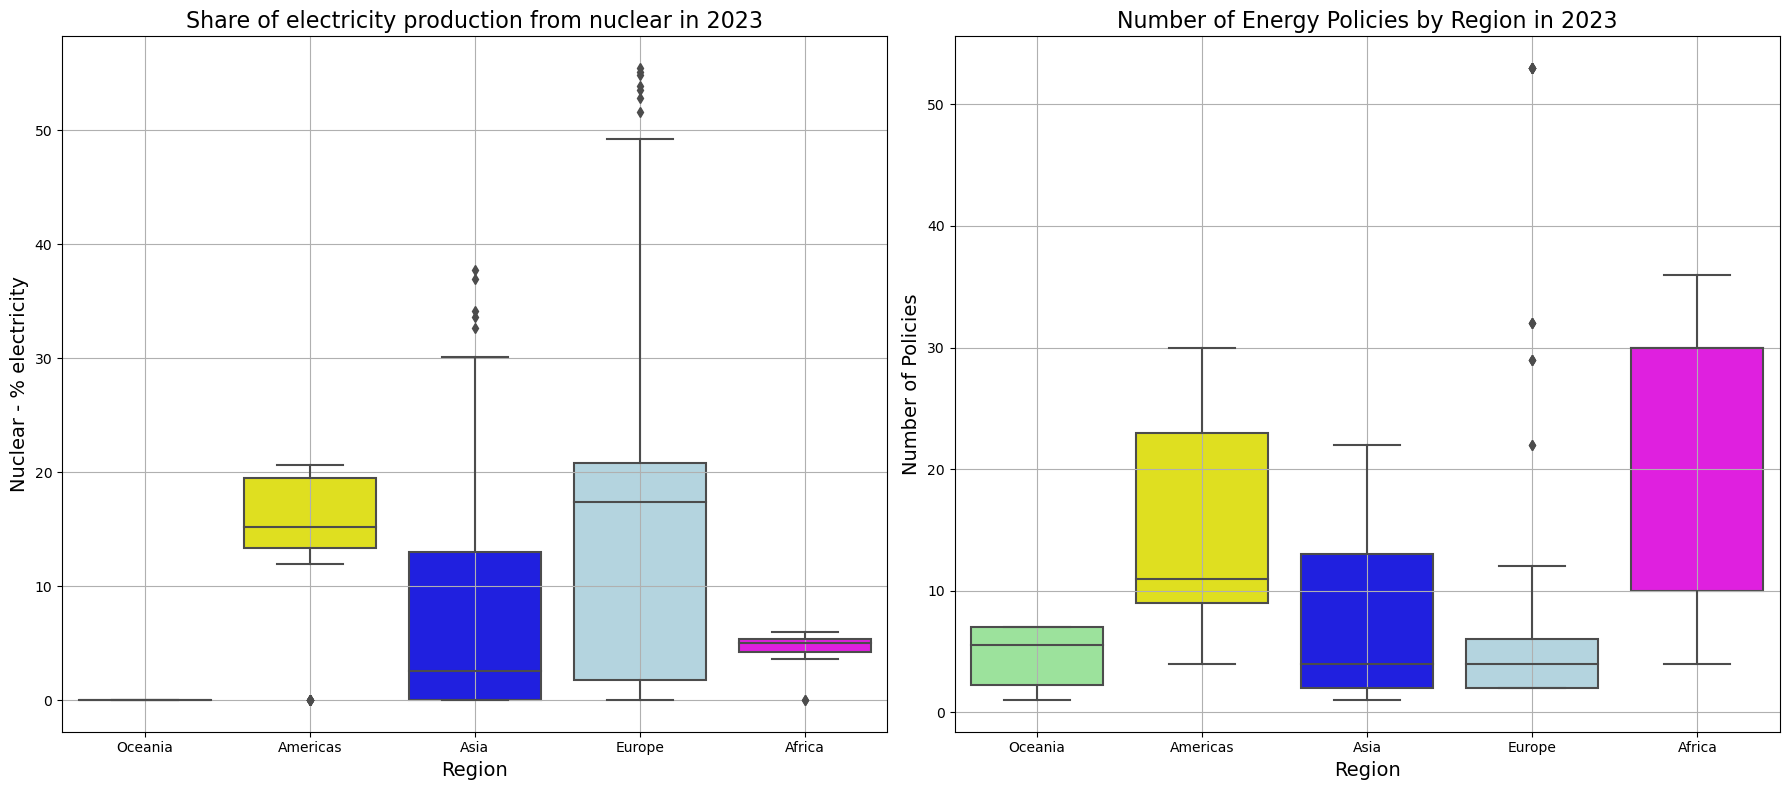

In [44]:
# Function to create the box plots for renewable energy share and policy count by region
def plot_boxplots_by_region(df):
    fig, axes = plt.subplots(1, 2, figsize=(18, 8))

    # Plot for renewable energy share
    sns.boxplot(
        data=df,
        x='region',
        y='Nuclear - % electricity',
        palette=region_colors_fixed,
        ax=axes[0]
    )
    axes[0].set_title('Share of electricity production from nuclear in 2023', fontsize=16)
    axes[0].set_xlabel('Region', fontsize=14)
    axes[0].set_ylabel('Nuclear - % electricity', fontsize=14)
    axes[0].grid(True)

    # Plot for policy count
    sns.boxplot(
        data=df,
        x='region',
        y='policy_count',
        palette=region_colors_fixed,
        ax=axes[1]
    )
    axes[1].set_title('Number of Energy Policies by Region in 2023', fontsize=16)
    axes[1].set_xlabel('Region', fontsize=14)
    axes[1].set_ylabel('Number of Policies', fontsize=14)
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()

# Plot the box plots
plot_boxplots_by_region(df_combined)

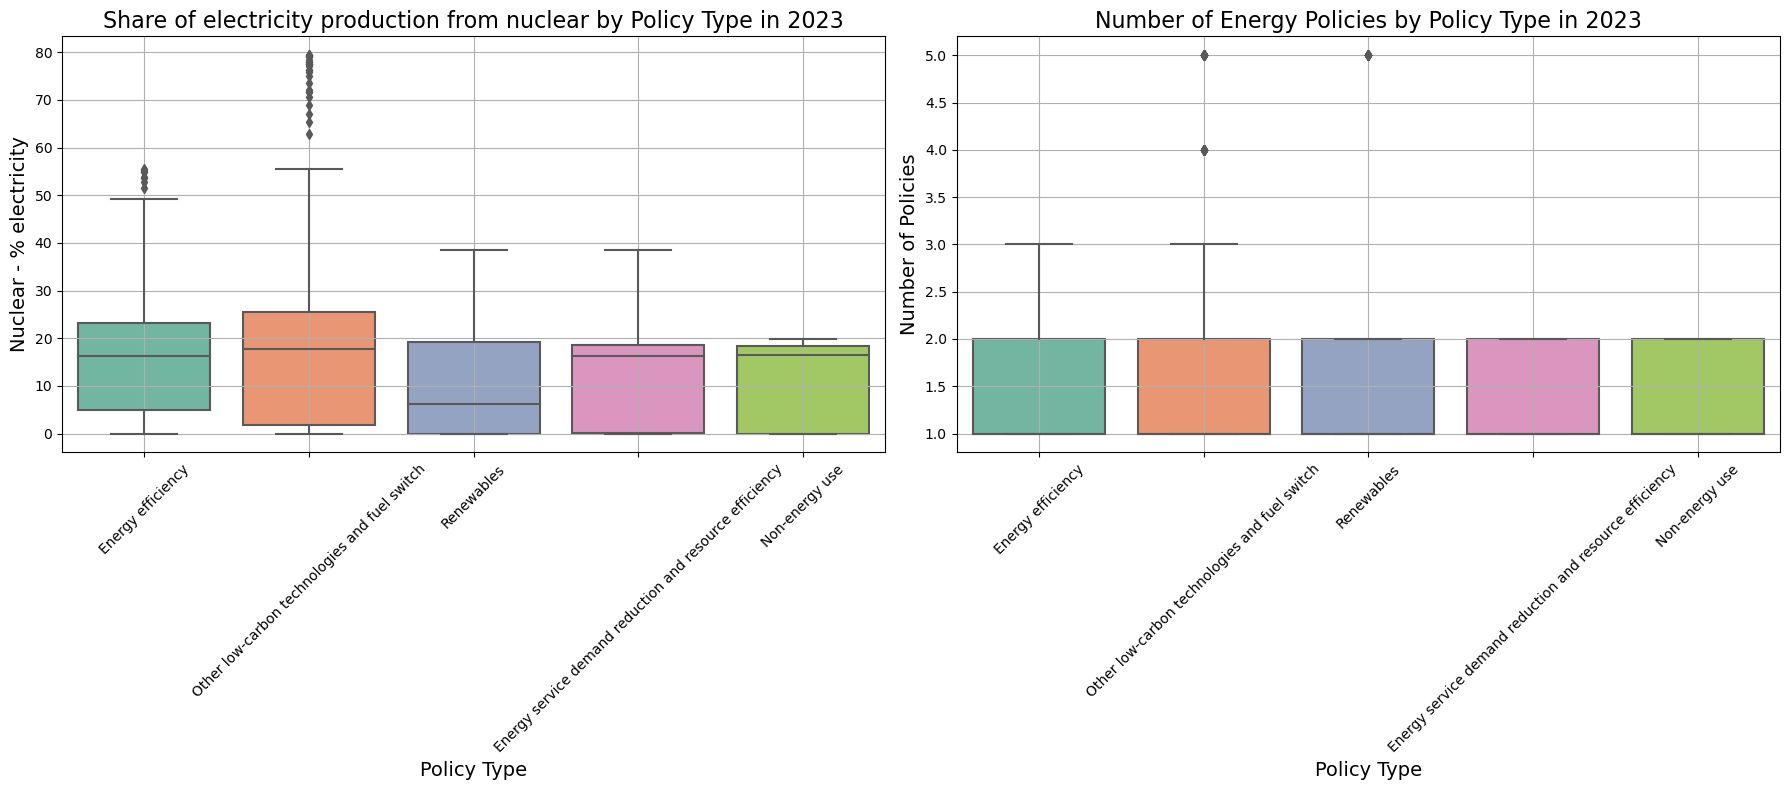

In [45]:
# Example of region_colors_fixed definition
# Assuming you have predefined colors for regions, you might need to define something similar for policy types.
# Here we'll just use a default color palette.

df_nuclear_policies['policy_count'] = 1  # Add a column to count policies
policies_agg = df_nuclear_policies.groupby(['country_iso', 'active_year', 'policy_type']).agg({'policy_count': 'sum'}).reset_index()

# Merge with the renewable energy consumption data
df_combined_policy_type = pd.merge(
    df_share_energy_prod,
    policies_agg,
    left_on=['Code', 'Year'],
    right_on=['country_iso', 'active_year']
)

df_combined = df_combined[df_combined["Year"] >= 2000]

policy_type_colors_fixed = sns.color_palette("Set2", n_colors=df_combined_policy_type['policy_type'].nunique())

# Function to create the box plots for renewable energy share and policy count by policy type
def plot_boxplots_by_policy_type(df):
    fig, axes = plt.subplots(1, 2, figsize=(18, 8))

    # Plot for renewable energy share
    sns.boxplot(
        data=df,
        x='policy_type',
        y='Nuclear - % electricity',
        palette=policy_type_colors_fixed,
        ax=axes[0]
    )
    axes[0].set_title('Share of electricity production from nuclear by Policy Type in 2023', fontsize=16)
    axes[0].set_xlabel('Policy Type', fontsize=14)
    axes[0].set_ylabel('Nuclear - % electricity', fontsize=14)
    axes[0].grid(True)
    axes[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

    # Plot for policy count
    sns.boxplot(
        data=df,
        x='policy_type',
        y='policy_count',
        palette=policy_type_colors_fixed,
        ax=axes[1]
    )
    axes[1].set_title('Number of Energy Policies by Policy Type in 2023', fontsize=16)
    axes[1].set_xlabel('Policy Type', fontsize=14)
    axes[1].set_ylabel('Number of Policies', fontsize=14)
    axes[1].grid(True)
    axes[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

    plt.tight_layout()
    plt.show()

# Plot the box plots
plot_boxplots_by_policy_type(df_combined_policy_type)

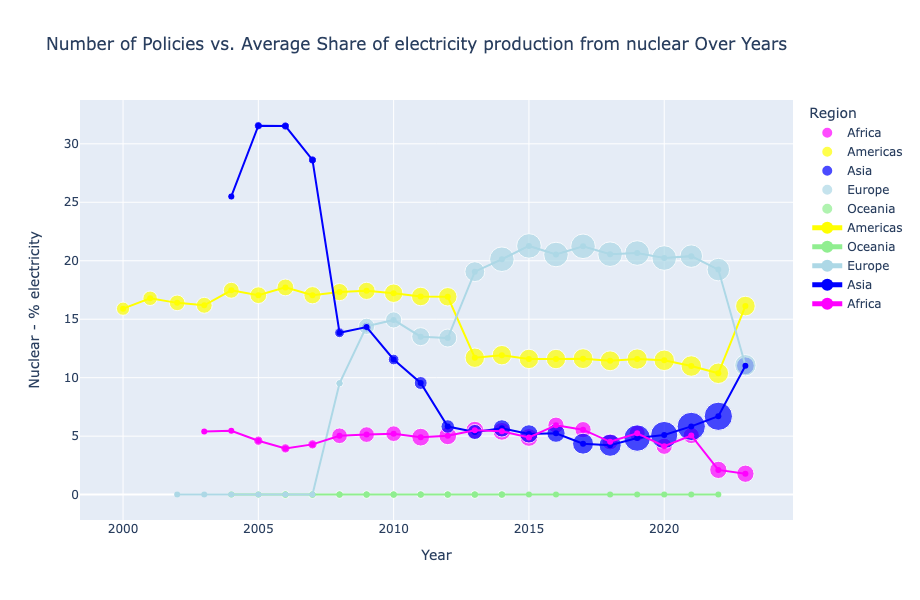

In [46]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Assuming df_combined is already prepared as per your provided code
# Aggregate the data by region and year
region_agg = df_combined.groupby(['region', 'Year']).agg({
    'policy_count': 'sum',  # Total number of policies
    'Nuclear - % electricity': 'mean'  # Average share of renewable energy consumption
}).reset_index()

# Define the custom color palette for each region
region_colors_fixed = {
    'Americas': 'yellow',
    'Oceania': 'lightgreen',
    'Europe': 'lightblue',
    'Asia': 'blue',
    'Africa': 'magenta'
}

# Function to plot number of policies vs. avg share of renewables over years by region
def plot_policies_vs_nuclear_interactive(region_agg):
    # Create a scatter plot with lines
    fig = px.scatter(
        region_agg,
        x='Year',
        y='Nuclear - % electricity',
        color='region',
        size='policy_count',
        color_discrete_map=region_colors_fixed,
        title='Number of Policies vs. Average Share of electricity production from nuclear Over Years',
        labels={'policy_count': 'Number of Policies', 'Nuclear - % electricity': 'Nuclear - % electricity'}
    )
    
    # Add lines for each region
    for region in region_colors_fixed.keys():
        region_data = region_agg[region_agg['region'] == region]
        fig.add_trace(go.Scatter(
            x=region_data['Year'],
            y=region_data['Nuclear - % electricity'],
            mode='lines+markers',
            name=region,
            marker=dict(color=region_colors_fixed[region]),
            line=dict(color=region_colors_fixed[region]),
            text=region_data['policy_count'],  # Hover text will show number of policies
            hovertemplate='Year: %{x}<br>Avg Share of Nuclear: %{y:.2f}%<br>Number of Policies: %{text}<extra></extra>'
        ))
    
    # Update layout for better aesthetics
    fig.update_layout(
        xaxis_title='Year',
        yaxis_title='Nuclear - % electricity',
        legend_title='Region',
        hovermode='x unified',
        height=600
    )
    
    fig.show()

# Call the plotting function with the refined approach
plot_policies_vs_nuclear_interactive(region_agg)

#### Number of Energy Policies vs CO₂ and Greenhouse Gas Emissions

In [47]:
df_ghg_emission = pd.read_csv('new_data/energy/per-capita-ghg-emissions.csv')
df_ghg_emission = df_ghg_emission.dropna()
df_ghg_emission.head()

Entity Code  Year  \
0  Afghanistan  AFG  1850   
1  Afghanistan  AFG  1851   
2  Afghanistan  AFG  1852   
3  Afghanistan  AFG  1853   
4  Afghanistan  AFG  1854   

   Per-capita greenhouse gas emissions in CO₂ equivalents  
0                                           1.955458       
1                                           1.964986       
2                                           1.972589       
3                                           1.979090       
4                                           1.985106

In [48]:
# Define the custom color palette for each region
region_colors_fixed = {
    'Americas': 'yellow',
    'Oceania': 'lightgreen',
    'Europe': 'lightblue',
    'Asia': 'blue',
    'Africa': 'magenta'
}

# Prepare the data
df_sub['policy_count'] = 1  # Add a column to count policies
policies_agg = df_sub.groupby(['country_iso', 'active_year', 'region']).agg({'policy_count': 'sum'}).reset_index()

# Merge with the renewable energy consumption data
df_combined = pd.merge(
    df_ghg_emission,
    policies_agg,
    left_on=['Code', 'Year'],
    right_on=['country_iso', 'active_year']
)

df_combined = df_combined[df_combined["Year"] >= 2000]

# Function to plot the correlation with fixed region colors
def plot_correlation_fixed_colors(df, year):
    # Filter the data for the selected year
    df_year = df[df['Year'] == year]
    
    # Create the scatter plot
    plt.figure(figsize=(10, 6))
    scatter_plot = sns.scatterplot(
        data=df_year,
        x='policy_count',
        y='Per-capita greenhouse gas emissions in CO₂ equivalents',
        hue='region',
        palette=region_colors_fixed,
        s=100
    )
    
    # Add a regression line
    sns.regplot(
        data=df_year,
        x='policy_count',
        y='Per-capita greenhouse gas emissions in CO₂ equivalents',
        scatter=False,
        ax=scatter_plot
    )
    
    # Calculate and display correlation
    correlation = df_year['policy_count'].corr(df_year['Per-capita greenhouse gas emissions in CO₂ equivalents'])
    plt.title(f'Correlation between Number of Policies and Number of Energy Policies vs Per-capita greenhouse gas emissions in CO₂ equivalents in {year}\nCorrelation: {correlation:.2f}', fontsize=14)
    
    plt.xlabel('Number of Policies')
    plt.ylabel('Per-capita greenhouse gas emissions in CO₂ equivalents')
    plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.show()

# Create a dropdown widget for year selection
year_selector_fixed_colors = widgets.IntSlider(
    min=df_combined['Year'].min(),
    max=df_combined['Year'].max(),
    step=1,
    value=df_combined['Year'].min(),
    description='Year:'
)

# Link the dropdown to the plot function with fixed colors
def interactive_plot_fixed_colors(year):
    plot_correlation_fixed_colors(df_combined, year)

# Display the interactive plot
widgets.interactive(interactive_plot_fixed_colors, year=year_selector_fixed_colors)

interactive(children=(IntSlider(value=2000, description='Year:', max=2022, min=2000), Output()), _dom_classes=…

In [49]:
calculate_and_store_data(df_combined, f'ghg_emissions', 'Per-capita greenhouse gas emissions in CO₂ equivalents')

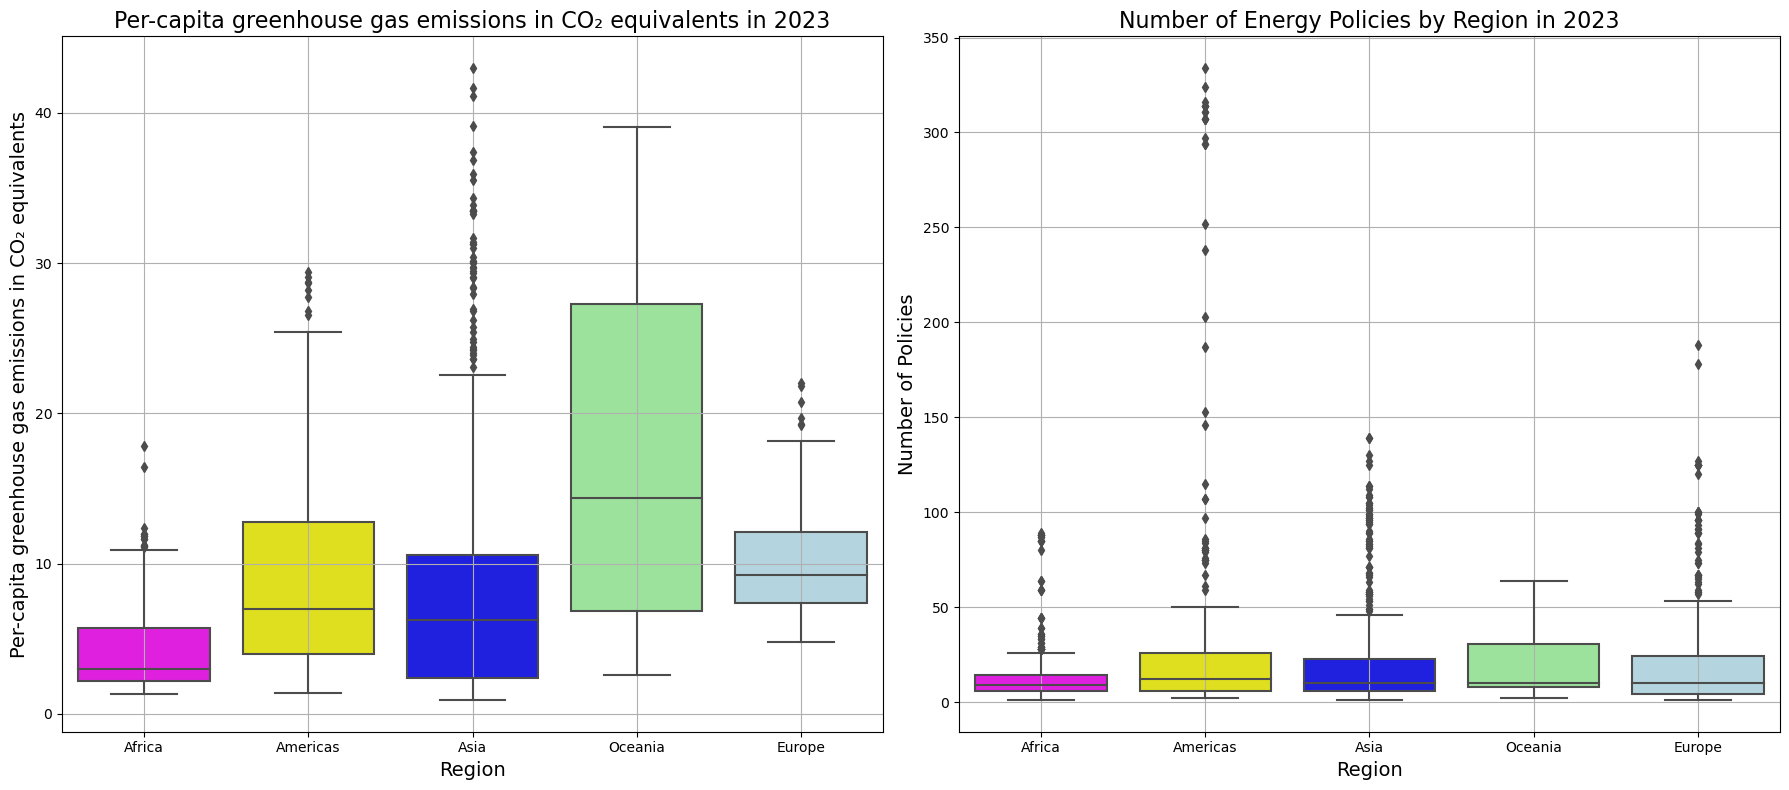

In [50]:
# Function to create the box plots for renewable energy share and policy count by region
def plot_boxplots_by_region(df):
    fig, axes = plt.subplots(1, 2, figsize=(18, 8))

    # Plot for renewable energy share
    sns.boxplot(
        data=df,
        x='region',
        y='Per-capita greenhouse gas emissions in CO₂ equivalents',
        palette=region_colors_fixed,
        ax=axes[0]
    )
    axes[0].set_title('Per-capita greenhouse gas emissions in CO₂ equivalents in 2023', fontsize=16)
    axes[0].set_xlabel('Region', fontsize=14)
    axes[0].set_ylabel('Per-capita greenhouse gas emissions in CO₂ equivalents', fontsize=14)
    axes[0].grid(True)

    # Plot for policy count
    sns.boxplot(
        data=df,
        x='region',
        y='policy_count',
        palette=region_colors_fixed,
        ax=axes[1]
    )
    axes[1].set_title('Number of Energy Policies by Region in 2023', fontsize=16)
    axes[1].set_xlabel('Region', fontsize=14)
    axes[1].set_ylabel('Number of Policies', fontsize=14)
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()

# Plot the box plots
plot_boxplots_by_region(df_combined)

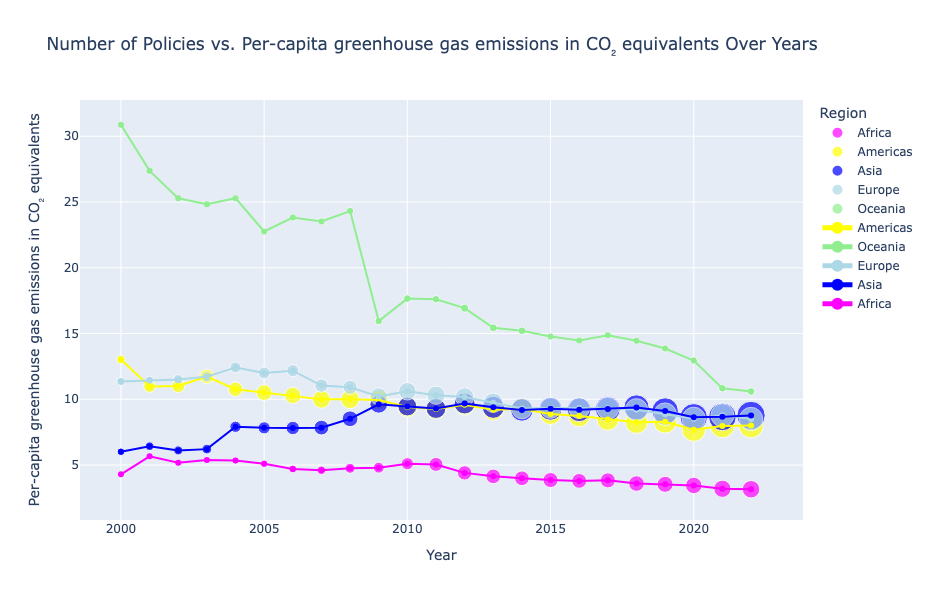

In [51]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Assuming df_combined is already prepared as per your provided code
# Aggregate the data by region and year
region_agg = df_combined.groupby(['region', 'Year']).agg({
    'policy_count': 'sum',  # Total number of policies
    'Per-capita greenhouse gas emissions in CO₂ equivalents': 'mean'  # Average share of renewable energy consumption
}).reset_index()

# Rename the column for clarity
# region_agg.rename(columns={'Per-capita greenhouse gas emissions in CO₂ equivalents': 'Per-capita greenhouse gas emissions in CO₂ equivalents'}, inplace=True)

# Define the custom color palette for each region
region_colors_fixed = {
    'Americas': 'yellow',
    'Oceania': 'lightgreen',
    'Europe': 'lightblue',
    'Asia': 'blue',
    'Africa': 'magenta'
}

# Function to plot number of policies vs. avg share of renewables over years by region
def plot_policies_vs_ghg_interactive(region_agg):
    # Create a scatter plot with lines
    fig = px.scatter(
        region_agg,
        x='Year',
        y='Per-capita greenhouse gas emissions in CO₂ equivalents',
        color='region',
        size='policy_count',
        color_discrete_map=region_colors_fixed,
        title='Number of Policies vs. Per-capita greenhouse gas emissions in CO₂ equivalents Over Years',
        labels={'policy_count': 'Number of Policies', 'Per-capita greenhouse gas emissions in CO₂ equivalents': 'Per-capita greenhouse gas emissions in CO₂ equivalents'}
    )
    
    # Add lines for each region
    for region in region_colors_fixed.keys():
        region_data = region_agg[region_agg['region'] == region]
        fig.add_trace(go.Scatter(
            x=region_data['Year'],
            y=region_data['Per-capita greenhouse gas emissions in CO₂ equivalents'],
            mode='lines+markers',
            name=region,
            marker=dict(color=region_colors_fixed[region]),
            line=dict(color=region_colors_fixed[region]),
            text=region_data['policy_count'],  # Hover text will show number of policies
            hovertemplate='Year: %{x}<br>Avg Share of Fossil Fuels: %{y:.2f}%<br>Number of Policies: %{text}<extra></extra>'
        ))
    
    # Update layout for better aesthetics
    fig.update_layout(
        xaxis_title='Year',
        yaxis_title='Per-capita greenhouse gas emissions in CO₂ equivalents',
        legend_title='Region',
        hovermode='x unified',
        height=600
    )
    
    fig.show()

# Call the plotting function with the refined approach
plot_policies_vs_ghg_interactive(region_agg)

### Save data

In [52]:
df = pd.DataFrame(data)
df.to_csv('out/1.1_policy_instrument.csv', index=False)